### Importing Libraries

In [2]:
import pandas as pd
import numpy as np 
import os, sys
import matplotlib as plt
import joblib
import seaborn as sns
%matplotlib inline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# from explore_data import Data_Preprocessing

In [183]:
plt=__import__("matplotlib.pyplot")
plt.pyplot.subplots

<function matplotlib.pyplot.subplots(nrows=1, ncols=1, *, sharex=False, sharey=False, squeeze=True, subplot_kw=None, gridspec_kw=None, **fig_kw)>

In [3]:
sys.path.append(os.path.abspath(os.path.join('../scripts')))
from explore_data import Data_Preprocessing
from outlier_handler import OutlierHandler
from visualize_data import *

### Reading Data

In [4]:
df_train = pd.read_csv('../data/train_ctrUa4k.csv')
df_test = pd.read_csv('../data/test_lAUu6dG.csv')

In [5]:
df_train['CoapplicantIncome'] = df_train['CoapplicantIncome'].astype('int64')

In [6]:
df = pd.concat([df_train, df_test])
df

,Customer_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Total_Amount_Spent,Prev_Credit_Duration,Credit_History,Property_Area,Credit_Status
0,LP001002,Male,No,0,Graduate,No,5849,0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban,NaN
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban,NaN
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban,NaN
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural,NaN


### Data Information

In [7]:
datapreprocessing = Data_Preprocessing(df)
outlier = OutlierHandler(df)

In [162]:
datapreprocessing.show_datatypes()

Customer_ID              object
Gender                   object
Married                  object
Dependents               object
Education                object
Self_Employed            object
ApplicantIncome           int64
CoapplicantIncome         int64
Total_Amount_Spent      float64
Prev_Credit_Duration    float64
Credit_History          float64
Property_Area            object
Credit_Status            object
dtype: object

In [163]:
df['Credit_Status'].value_counts()

Y    422
N    192
Name: Credit_Status, dtype: int64

In [155]:
df['Credit_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Credit_Status, dtype: float64

### Independent Variable Categorical 
 

In [12]:
datapreprocessing.drop_duplicates()

There are no duplicates rows


In [13]:
datapreprocessing.percentage_missing_rows()

The dataset has 51.07% of missing values


In [14]:
datapreprocessing.percentage_missing_values()

The dataset contains 4.7% of missing values


In [164]:
datapreprocessing.preprocess_view_na()

Customer_ID               0
Gender                   24
Married                   3
Dependents               25
Education                 0
Self_Employed            55
ApplicantIncome           0
CoapplicantIncome         0
Total_Amount_Spent       27
Prev_Credit_Duration     20
Credit_History           79
Property_Area             0
Credit_Status           367
dtype: int64

In [165]:
df.columns

Index(['Customer_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome',
       'Total_Amount_Spent', 'Prev_Credit_Duration', 'Credit_History',
       'Property_Area', 'Credit_Status'],
      dtype='object')

### Handling Missing Values

In [8]:
# Using Iterative imputer for filling missing values of Total_Amount_Spent and Prev_Credit_Duration
data_m = df.loc[:, ['Prev_Credit_Duration', 'Total_Amount_Spent']]
imp = IterativeImputer(RandomForestRegressor(), max_iter= 10, random_state=0)
data_m = pd.DataFrame(imp.fit_transform(data_m), columns = data_m.columns)

c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\impute\_iterative.py:700: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [9]:
for i in [df]:
    i['Gender'] = i['Gender'].fillna(df['Gender'].dropna().mode()[0])
    i['Married'] = i['Married'].fillna(df['Married'].dropna().mode()[0])
    i['Dependents'] = i['Dependents'].fillna(df['Dependents'].dropna().mode()[0])
    i['Self_Employed'] = i['Self_Employed'].fillna(df['Self_Employed'].dropna().mode()[0])
    i['Credit_History'] = i['Credit_History'].fillna(df['Credit_History'].dropna().mode()[0])

In [10]:
df.drop(columns = ['Prev_Credit_Duration', 'Total_Amount_Spent'], inplace = True)
df.reset_index(inplace = True, drop = True)
df

,Customer_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Credit_History,Property_Area,Credit_Status
0,LP001002,Male,No,0,Graduate,No,5849,0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...
976,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,1.0,Urban,NaN
977,LP002975,Male,Yes,0,Graduate,No,4158,709,1.0,Urban,NaN
978,LP002980,Male,No,0,Graduate,No,3250,1993,1.0,Semiurban,NaN
979,LP002986,Male,Yes,0,Graduate,No,5000,2393,1.0,Rural,NaN


In [11]:
df_1 = pd.concat([df, data_m], axis = 1)

In [12]:
for i in [df_1]: 
    i['Income'] = i['ApplicantIncome'] + i['CoapplicantIncome']

In [13]:
df_1['Income'] = df_1['Income'].apply(lambda x : x * 360).astype(int)
df_1['Total_Amount_Spent'] = df_1['Total_Amount_Spent'].apply(lambda x : x * 360).astype(int)
df_1['Prev_Credit_Duration'] = df_1['Prev_Credit_Duration'].apply(lambda x : x / 10).astype(int)

In [14]:
df_1.rename(columns = {'Prev_Credit_Duration' : 'Credit_duration'})
df_1 = df_1[['Customer_ID', 'Gender', 'Married', 'Dependents', 'Education','Self_Employed', 'Income', \
        'Property_Area','Total_Amount_Spent','Prev_Credit_Duration', 'Credit_History' , 'Credit_Status']]

In [361]:
df_1

,Customer_ID,Gender,Married,Dependents,Education,Self_Employed,Income,Property_Area,Total_Amount_Spent,Prev_Credit_Duration,Credit_History,Credit_Status
0,LP001002,Male,No,0,Graduate,No,2105640,Urban,51979,36,1.0,Y
1,LP001003,Male,Yes,1,Graduate,No,2192760,Rural,46080,36,1.0,N
2,LP001005,Male,Yes,0,Graduate,Yes,1080000,Urban,23760,36,1.0,Y
3,LP001006,Male,Yes,0,Not Graduate,No,1778760,Urban,43200,36,1.0,Y
4,LP001008,Male,No,0,Graduate,No,2160000,Urban,50760,36,1.0,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
976,LP002971,Male,Yes,3+,Not Graduate,Yes,2082960,Urban,40680,36,1.0,NaN
977,LP002975,Male,Yes,0,Graduate,No,1752120,Urban,41400,36,1.0,NaN
978,LP002980,Male,No,0,Graduate,No,1887480,Semiurban,45360,36,1.0,NaN
979,LP002986,Male,Yes,0,Graduate,No,2661480,Rural,56880,36,1.0,NaN


### Independent Variable Ordinal

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

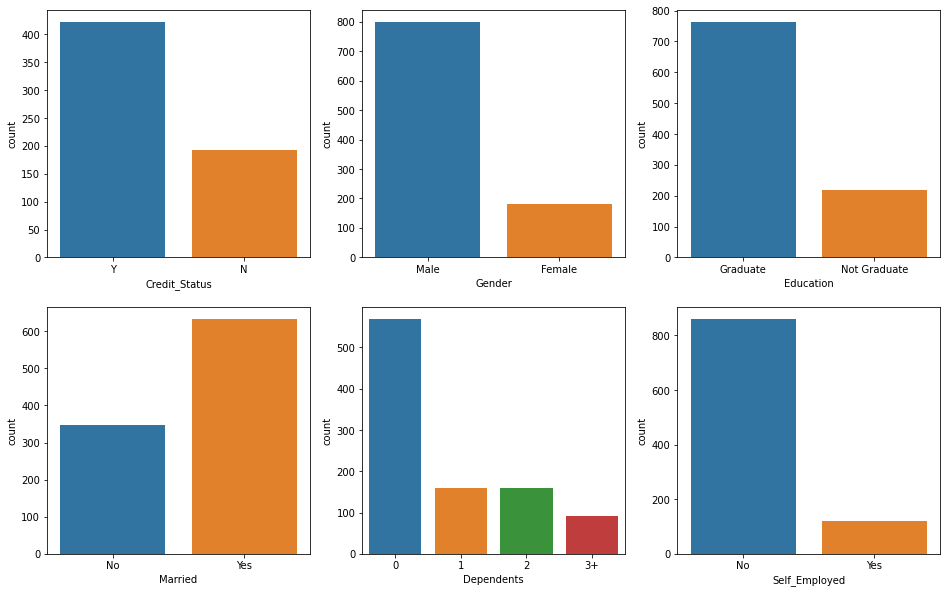

In [362]:
fig, ax = plt.pyplot.subplots(2,3,figsize = (16,10))
sns.countplot('Credit_Status', data= df_1 , ax = ax[0][0])
sns.countplot('Gender', data= df_1, ax = ax[0][1])
sns.countplot('Education', data= df_1, ax = ax[0][2])
sns.countplot('Married', data= df_1, ax = ax[1][0])
sns.countplot('Dependents', data= df_1, ax = ax[1][1])
sns.countplot('Self_Employed', data= df_1, ax = ax[1][2])

### Checking for Outliers

In [215]:
OutlierHandler(df_1).getOverview(['Income', 'Total_Amount_Spent'])

Name of columns,Income,Total_Amount_Spent
Min,519120,3240
Q1,1499760.0,36360.0
Median,1913040.0,46080.0
Q3,2630880.0,57600.0
Max,29160000,252000
IQR,1131120.0,21240.0
Lower fence,-196920.0,4500.0
Upper fence,4327560.0,89460.0
Skew,6.042451,2.751545
Number_of_outliers,76,72


### Bivariate Analysis 

<AxesSubplot:xlabel='Credit_Status', ylabel='Income'>

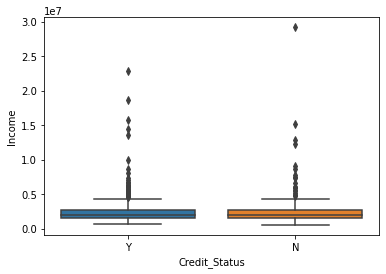

In [217]:
sns.boxplot(x ='Credit_Status', y = 'Income', data = df_1)

<AxesSubplot:xlabel='Credit_Status', ylabel='Income'>

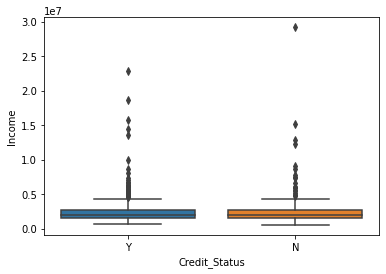

In [216]:
sns.boxplot(x = 'Credit_Status', y = 'Income', data = df_1)

In [192]:
# plt.pyplot.figure(figsize = (15,15))
# correlation_matrix = df_1.corr()
# sns.heatmap(correlation_matrix, annot = True)

In [193]:
Data_Preprocessing(df_1).preprocess_view_na()

Customer_ID               0
Gender                    0
Married                   0
Dependents                0
Education                 0
Self_Employed             0
Income                    0
Property_Area             0
Total_Amount_Spent        0
Prev_Credit_Duration      0
Credit_History            0
Credit_Status           367
dtype: int64

In [21]:
from sklearn import metrics
from sklearn import linear_model
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.impute import SimpleImputer
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler,MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

### Model Building 1

In [16]:
df_2 = df_1.copy()

In [219]:
df_2

,Customer_ID,Gender,Married,Dependents,Education,Self_Employed,Income,Property_Area,Total_Amount_Spent,Prev_Credit_Duration,Credit_History,Credit_Status
0,LP001002,Male,No,0,Graduate,No,2105640,Urban,51979,36,1.0,Y
1,LP001003,Male,Yes,1,Graduate,No,2192760,Rural,46080,36,1.0,N
2,LP001005,Male,Yes,0,Graduate,Yes,1080000,Urban,23760,36,1.0,Y
3,LP001006,Male,Yes,0,Not Graduate,No,1778760,Urban,43200,36,1.0,Y
4,LP001008,Male,No,0,Graduate,No,2160000,Urban,50760,36,1.0,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
976,LP002971,Male,Yes,3+,Not Graduate,Yes,2082960,Urban,40680,36,1.0,NaN
977,LP002975,Male,Yes,0,Graduate,No,1752120,Urban,41400,36,1.0,NaN
978,LP002980,Male,No,0,Graduate,No,1887480,Semiurban,45360,36,1.0,NaN
979,LP002986,Male,Yes,0,Graduate,No,2661480,Rural,56880,36,1.0,NaN


In [17]:
X_train_1 = df_2.loc[:613]
X_test_1 = df_2.loc[613:]

In [18]:
X_train_1['Credit_Status'] = X_train_1['Credit_Status'].replace({'Y' : 1, 'N' : 0})

C:\Users\shekoni.ridwan\AppData\Local\Temp\ipykernel_29388\3954581651.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_1['Credit_Status'] = X_train_1['Credit_Status'].replace({'Y' : 1, 'N' : 0})


In [228]:
X_train_1.head()

,Customer_ID,Gender,Married,Dependents,Education,Self_Employed,Income,Property_Area,Total_Amount_Spent,Prev_Credit_Duration,Credit_History,Credit_Status
0,LP001002,Male,No,0,Graduate,No,2105640,Urban,51979,36,1.0,1
1,LP001003,Male,Yes,1,Graduate,No,2192760,Rural,46080,36,1.0,0
2,LP001005,Male,Yes,0,Graduate,Yes,1080000,Urban,23760,36,1.0,1
3,LP001006,Male,Yes,0,Not Graduate,No,1778760,Urban,43200,36,1.0,1
4,LP001008,Male,No,0,Graduate,No,2160000,Urban,50760,36,1.0,1


In [19]:
X = X_train_1.drop(columns = ['Customer_ID', 'Credit_Status'], axis = 1)
y = X_train_1['Credit_Status']

In [242]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [22]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
num_cols = X_train.select_dtypes(exclude = ['object']).columns.tolist()
cat_cols = X_train.select_dtypes(include = ['object']).columns.tolist()

In [290]:
full_pipe.fit(X_train, y_train)
print("model score: %.3f" % full_pipe.score(X_test, y_test))

model score: 0.811


In [23]:
model = make_pipeline(
    OneHotEncoder(handle_unknown='ignore'),
    SimpleImputer(strategy='median'),
    StandardScaler(with_mean=False),
    LogisticRegression()
)

model.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder', OneHotEncoder(handle_unknown='ignore')),
                ('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler(with_mean=False)),
                ('logisticregression', LogisticRegression())])

In [24]:
model.score(X_test, y_test)

0.7567567567567568

In [25]:
model.predict([['Male', 'No', 0, 'Graduate', 'No', 770000,'Semiurban', 35280, 0, 1]])

c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [26]:
model.predict([['Male', 'No', 0, 'Graduate', 'No', 770000,'Semiurban', 35280, 0, 0]])

c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [28]:
joblib.dump(model, '../auction_model.pkl')

['../auction_model.pkl']

In [351]:
from sklearn.feature_selection import SelectKBest, chi2
best_feature = SelectKBest(chi2, k = 10)
fit = best_feature.fit(X_2,y_2)
df_score = pd.DataFrame(fit.scores_)
df_col = pd.DataFrame(X.columns)
featureScores = pd.concat([df_col, df_score], axis = 1)
featureScores.columns = ['feature', 'Score']
featureScores

,feature,Score
0,Gender,1.624073e-01
1,Married,1.782425e+00
2,Dependents,8.595276e-02
3,Education,9.883903e-01
4,Self_Employed,7.284803e-03
5,Income,1.281451e+06
6,Property_Area,4.398854e+00
7,Total_Amount_Spent,1.348485e+04
8,Prev_Credit_Duration,3.053556e-01
9,Credit_History,2.600588e+01


In [352]:
from sklearn.ensemble import ExtraTreesClassifier
model_score = ExtraTreesClassifier()
model_score.fit(X_2, y_2)
print(model_score.feature_importances_)

[0.02308564 0.01939987 0.06120912 0.01904081 0.02457507 0.23837465
 0.0530678  0.22567507 0.05226025 0.28331171]


<AxesSubplot:>

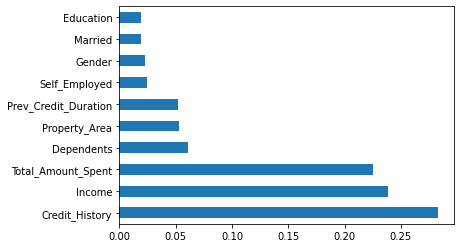

In [354]:
feat_importance = pd.Series(model_score.feature_importances_, index = X_2.columns)
feat_importance.nlargest(10).plot(kind = 'barh')


### Feature Engineering / Modeling II 


In [376]:
from sklearn.base import TransformerMixin, BaseEstimator

In [408]:
df_3 = df_1.copy()
df_3

,Customer_ID,Gender,Married,Dependents,Education,Self_Employed,Income,Property_Area,Total_Amount_Spent,Prev_Credit_Duration,Credit_History,Credit_Status
0,LP001002,Male,No,0,Graduate,No,2105640,Urban,51979,36,1.0,Y
1,LP001003,Male,Yes,1,Graduate,No,2192760,Rural,46080,36,1.0,N
2,LP001005,Male,Yes,0,Graduate,Yes,1080000,Urban,23760,36,1.0,Y
3,LP001006,Male,Yes,0,Not Graduate,No,1778760,Urban,43200,36,1.0,Y
4,LP001008,Male,No,0,Graduate,No,2160000,Urban,50760,36,1.0,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
976,LP002971,Male,Yes,3+,Not Graduate,Yes,2082960,Urban,40680,36,1.0,NaN
977,LP002975,Male,Yes,0,Graduate,No,1752120,Urban,41400,36,1.0,NaN
978,LP002980,Male,No,0,Graduate,No,1887480,Semiurban,45360,36,1.0,NaN
979,LP002986,Male,Yes,0,Graduate,No,2661480,Rural,56880,36,1.0,NaN


In [409]:
X_train_2 = df_3.loc[:613]
X_test_2 = df_3.loc[613:]

In [517]:
X = X_train_2.drop(columns = ['Credit_Status', 'Customer_ID'], axis = 1)
y = X_train_2['Credit_Status']

In [654]:
class FeatureTransformer(BaseEstimator, TransformerMixin): 
    
    def __init__(self, col_1, col_2, col_3, col_4, col_5, col_6, r =1):
        self.r = r
        self.col_1 = col_1
        self.col_2 = col_2
        self.col_3 = col_3 
        self.col_4 = col_4 
        self.col_5 = col_5 
        self.col_6 = col_6 
        print('Init Called')

    def fit(self, X, y = None): 
        return self
    
    def transform(self, X, y = None):         
        X['EMI'] = X.apply(lambda x : (x[self.col_1] *self.r*((1+self.r)**x[self.col_2])) / ((1+self.r)**((x[self.col_2])-1))/10, axis=1)
        X['Dependents_EMI_mean'] = X.groupby([self.col_3])['EMI'].transform('mean')

        #Loan Amount per total Income 
        X['LoanAmount_per_Total_Income'] = (X[self.col_1])/X[self.col_5]
        #Loan Amount Term Per total Income
        X['Loan_Amount_Term_per_Total_Income'] = X[self.col_2]/X[self.col_5]

        #EMI Per Loan Amount Term
        X['EMI_Per_Loan_Amount_Term'] = X['EMI']/X[self.col_2]

        # #EMI Per Total_Amount_Spent
        X['EMI_Per_LoanAmount'] = X['EMI']/X[self.col_1]

        #Categotrical variable wise mean of LoanAmount_PerTotal_Income
        X['Property_Area_LoanAmount_per_TotalIncome_mean'] =X.groupby([self.col_4])['LoanAmount_per_Total_Income'].transform('mean')

        #Credit History wise sum of total income 
        X['Credit_History_Income_Sum'] = X.groupby([self.col_6])[self.col_5].transform('sum')

        #Dependents wise sum of Total_Amount_Spent
        X['Dependents_LoanAmount_Sum'] = X.groupby([self.col_3])[self.col_1].transform('sum')
        X.drop('EMI', axis = 1, inplace = True)
        return X

    def get_feature_name(self, X, y = None):
        cat = self.transform(X)
        return cat.columns

In [655]:
X

,Gender,Married,Dependents,Education,Self_Employed,Income,Property_Area,Total_Amount_Spent,Prev_Credit_Duration,Credit_History,...,LoanAmount_per_Total_Income,Loan_Amount_Term_per_Total_Income,EMI_Per_Loan_Amount_Term,EMI_Per_LoanAmount,Property_Area_LoanAmount_per_TotalIncome_mean,Credit_History_Income_Sum,Dependents_LoanAmount_Sum,EMI,Loan_Amount_Term_Bins,TotalIncome_Bins
0,Male,No,0,Graduate,No,2105640,Urban,51979,36,1.0,...,0.024686,0.000017,1.208351,0.000837,0.023484,1321359840,17604904,43.500653,1.0,2.0
1,Male,Yes,1,Graduate,No,2192760,Rural,46080,36,1.0,...,0.021015,0.000016,1.071218,0.000837,0.024073,1321359840,5804116,38.563845,1.0,1.0
2,Male,Yes,0,Graduate,Yes,1080000,Urban,23760,36,1.0,...,0.022000,0.000033,0.552347,0.000837,0.023484,1321359840,17604904,19.884483,1.0,1.0
3,Male,Yes,0,Not Graduate,No,1778760,Urban,43200,36,1.0,...,0.024287,0.000020,1.004267,0.000837,0.023484,1321359840,17604904,36.153605,1.0,2.0
4,Male,No,0,Graduate,No,2160000,Urban,50760,36,1.0,...,0.023500,0.000017,1.180013,0.000837,0.023484,1321359840,17604904,42.480486,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,1044000,Rural,25560,36,1.0,...,0.024483,0.000034,0.594191,0.000837,0.024073,1321359840,17604904,21.390883,1.0,2.0
610,Male,Yes,3+,Graduate,No,1478160,Rural,14400,18,1.0,...,0.009742,0.000012,0.669511,0.000837,0.024073,1321359840,3466923,12.051202,0.0,0.0
611,Male,Yes,1,Graduate,No,2992320,Urban,91080,36,1.0,...,0.030438,0.000012,2.117329,0.000837,0.023484,1321359840,5804116,76.223850,1.0,4.0
612,Male,Yes,2,Graduate,No,2729880,Urban,67320,36,1.0,...,0.024660,0.000013,1.564982,0.000837,0.023484,1321359840,5455857,56.339367,1.0,2.0


In [656]:
from sklearn.preprocessing import KBinsDiscretizer
class BinTransformer(BaseEstimator, TransformerMixin):
    def __init__(self): 
        print('Bin__init__ called')
    
    def fit(self, X, y = None):
        return self
    
    def transform(self, X, y = None):
        Loan_Amount_Term_discretizer = KBinsDiscretizer(n_bins=5, encode= 'ordinal', strategy='quantile')
        X['Loan_Amount_Term_Bins'] = Loan_Amount_Term_discretizer.fit_transform(X['Prev_Credit_Duration'].values.reshape(-1,1)).astype(float)

        TotalIncome_discretizer = KBinsDiscretizer(n_bins = 5, encode = 'ordinal', strategy='quantile')
        X['TotalIncome_Bins'] = TotalIncome_discretizer.fit_transform(X['Income'].values.reshape(-1,1)).astype(float)

        LoanAmount_per_TotalIncome_discretizer = KBinsDiscretizer(n_bins = 5, encode = 'ordinal', strategy='quantile')
        X['TotalIncome_Bins'] = LoanAmount_per_TotalIncome_discretizer.fit_transform(X['LoanAmount_per_Total_Income'].values.reshape(-1,1)).astype(float)
        return X 
    
    def get_feature_name(self,X,y = None):
        cat = self.transform(X)
        return cat.columns

In [657]:
pipe = make_pipeline(
    FeatureTransformer('Total_Amount_Spent', 'Prev_Credit_Duration', 'Dependents', 'Property_Area', 'Income', 'Credit_History',0.0083),
    BinTransformer(),
    OneHotEncoder(handle_unknown='ignore'),
    SimpleImputer(strategy='median'),
    StandardScaler(with_mean=False),
    LogisticRegression()   
)
transformed_df = pipe.fit(X_train, y_train)

Init Called
Bin__init__ called


c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\preprocessing\_discretization.py:291: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(


In [658]:
transformed_df

Pipeline(steps=[('featuretransformer',
                 FeatureTransformer(col_1='Total_Amount_Spent',
                                    col_2='Prev_Credit_Duration',
                                    col_3='Dependents', col_4='Property_Area',
                                    col_5='Income', col_6='Credit_History',
                                    r=0.0083)),
                ('bintransformer', BinTransformer()),
                ('onehotencoder', OneHotEncoder(handle_unknown='ignore')),
                ('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler(with_mean=False)),
                ('logisticregression', LogisticRegression())])

In [659]:
transformed_df.named_steps['featuretransformer'].get_feature_name(X)

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Income', 'Property_Area', 'Total_Amount_Spent', 'Prev_Credit_Duration',
       'Credit_History', 'Dependents_EMI_mean', 'LoanAmount_per_Total_Income',
       'Loan_Amount_Term_per_Total_Income', 'EMI_Per_Loan_Amount_Term',
       'EMI_Per_LoanAmount', 'Property_Area_LoanAmount_per_TotalIncome_mean',
       'Credit_History_Income_Sum', 'Dependents_LoanAmount_Sum',
       'Loan_Amount_Term_Bins', 'TotalIncome_Bins'],
      dtype='object')

In [660]:
transformed_df.named_steps['bintransformer'].get_feature_name(X)

c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\preprocessing\_discretization.py:291: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(


Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Income', 'Property_Area', 'Total_Amount_Spent', 'Prev_Credit_Duration',
       'Credit_History', 'Dependents_EMI_mean', 'LoanAmount_per_Total_Income',
       'Loan_Amount_Term_per_Total_Income', 'EMI_Per_Loan_Amount_Term',
       'EMI_Per_LoanAmount', 'Property_Area_LoanAmount_per_TotalIncome_mean',
       'Credit_History_Income_Sum', 'Dependents_LoanAmount_Sum',
       'Loan_Amount_Term_Bins', 'TotalIncome_Bins'],
      dtype='object')

In [663]:
y_pred = transformed_df.predict(X_test)

c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\preprocessing\_discretization.py:291: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(


In [666]:
transformed_df.score(X_test, y_test)

c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\preprocessing\_discretization.py:291: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(


0.7189189189189189

In [668]:
trans = FeatureTransformer('Total_Amount_Spent', 'Prev_Credit_Duration', 'Dependents', 'Property_Area', 'Income', 'Credit_History').fit_transform(X)
trans.head()


Init Called


,Gender,Married,Dependents,Education,Self_Employed,Income,Property_Area,Total_Amount_Spent,Prev_Credit_Duration,Credit_History,Dependents_EMI_mean,LoanAmount_per_Total_Income,Loan_Amount_Term_per_Total_Income,EMI_Per_Loan_Amount_Term,EMI_Per_LoanAmount,Property_Area_LoanAmount_per_TotalIncome_mean,Credit_History_Income_Sum,Dependents_LoanAmount_Sum,Loan_Amount_Term_Bins,TotalIncome_Bins
0,Male,No,0,Graduate,No,2105640,Urban,51979,36,1.0,9780.502222,0.024686,0.000017,288.772222,0.2,0.023484,1321359840,17604904,1.0,2.0
1,Male,Yes,1,Graduate,No,2192760,Rural,46080,36,1.0,11380.619608,0.021015,0.000016,256.000000,0.2,0.024073,1321359840,5804116,1.0,1.0
2,Male,Yes,0,Graduate,Yes,1080000,Urban,23760,36,1.0,9780.502222,0.022000,0.000033,132.000000,0.2,0.023484,1321359840,17604904,1.0,1.0
3,Male,Yes,0,Not Graduate,No,1778760,Urban,43200,36,1.0,9780.502222,0.024287,0.000020,240.000000,0.2,0.023484,1321359840,17604904,1.0,2.0
4,Male,No,0,Graduate,No,2160000,Urban,50760,36,1.0,9780.502222,0.023500,0.000017,282.000000,0.2,0.023484,1321359840,17604904,1.0,2.0


In [669]:
transformed_df.predict([['Male', 'No', 1,'Grdauate', 'No', 2105000,'Urban',50000,18,1]])

AttributeError: 'list' object has no attribute 'apply'

In [613]:
transformed_df.predict([['Male', 'No', 1,'Grdauate', 'No', 2105000,'Urban',50000,18,1.]])

AttributeError: 'list' object has no attribute 'apply'

In [87]:
def model_score(model_name, model, X_train,
                X_test, y_train, y_test, test=False):
    """
    Input: Transformed feature and target sets
    Output: If test=True, test scores
    """

    my_model = model
    my_model.fit(X_train,y_train)
    y_pred = my_model.predict(X_test)
    if test:
        print("Calculating test score...")
        print(f'{model_name} accuracy score: {accuracy_score(y_test,y_pred):.4}\n')
        # print(f'Classification Report \n {classification_report(y_test, y_pred)}')

    return my_model, y_pred

In [88]:
knn= model_score('KNN', KNeighborsClassifier(n_neighbors=5),
                        X_train, X_test,
                        y_train, y_test,test=True)

lr = model_score('LogReg', LogisticRegression(),
                       X_train, X_test,
                       y_train, y_test,test=True)

gbm = model_score('XGBoost', xgb.XGBClassifier(),
                       X_train, X_test,
                       y_train, y_test,test=True)

rf = model_score('RF', RandomForestClassifier(),
                       X_train, X_test,
                       y_train, y_test,test=True)

nb = model_score('Gaussian', GaussianNB(), 
                        X_train, X_test, 
                        y_train,y_test, test = True)

svc = model_score('SVM', SVC(probability=True),
                       X_train, X_test,
                       y_train, y_test,test=True)


Calculating test score...
KNN accuracy score: 0.8054

Calculating test score...
LogReg accuracy score: 0.7568

Calculating test score...
XGBoost accuracy score: 0.7405

Calculating test score...
RF accuracy score: 0.7892

Calculating test score...
Gaussian accuracy score: 0.8108

Calculating test score...
SVM accuracy score: 0.8162



In [92]:
i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y): 
    print('\n{} of kfold {}'.format(i,kf.n_splits)) 
    xtr,xte = X.iloc[train_index],X.iloc[test_index] 
    ytr,yvl = y.iloc[train_index],y.iloc[test_index] 
    model = LogisticRegression(random_state=1) 
    model.fit(xtr, ytr) 
    pred_test = model.predict(xte) 
    score = accuracy_score(yvl,pred_test)
    print('accuracy_score',score) 
    i+=1 
pred_test = model.predict(X_test) 
pred=model.predict_proba(xte)[:,1]


1 of kfold 5
accuracy_score 0.7804878048780488

2 of kfold 5
accuracy_score 0.8373983739837398

3 of kfold 5
accuracy_score 0.7560975609756098

4 of kfold 5
accuracy_score 0.7398373983739838

5 of kfold 5
accuracy_score 0.7295081967213115


### FIne Tuning

In [93]:
from sklearn.model_selection import GridSearchCV
paramgrid = {
    'C' :[0.001,0.01,0.1,1,10,100,1000],
    'penalty' : ['l1', 'l2'], 
    'max_iter' : list(range(100,800,100)), 
    'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}
LR_search = GridSearchCV(LogisticRegression(), paramgrid, refit =True, verbose = 3, cv= 5)
LR_search.fit(X_train, y_train)

Fitting 5 folds for each of 490 candidates, totalling 2450 fits
[CV 1/5] END C=0.001, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.001, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.001, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.001, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.001, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=0.001, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.001, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.001, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=0.001, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=0.001, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0

c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\

[CV 2/5] END C=0.001, max_iter=100, penalty=l2, solver=newton-cg;, score=0.744 total time=   0.0s
[CV 3/5] END C=0.001, max_iter=100, penalty=l2, solver=newton-cg;, score=0.826 total time=   0.0s
[CV 4/5] END C=0.001, max_iter=100, penalty=l2, solver=newton-cg;, score=0.802 total time=   0.0s


c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
c:\Users\shekoni.ridwan\Docu

[CV 5/5] END C=0.001, max_iter=100, penalty=l2, solver=newton-cg;, score=0.812 total time=   0.0s
[CV 1/5] END C=0.001, max_iter=100, penalty=l2, solver=lbfgs;, score=0.744 total time=   0.0s
[CV 2/5] END C=0.001, max_iter=100, penalty=l2, solver=lbfgs;, score=0.744 total time=   0.0s
[CV 3/5] END C=0.001, max_iter=100, penalty=l2, solver=lbfgs;, score=0.779 total time=   0.0s
[CV 4/5] END C=0.001, max_iter=100, penalty=l2, solver=lbfgs;, score=0.779 total time=   0.0s
[CV 5/5] END C=0.001, max_iter=100, penalty=l2, solver=lbfgs;, score=0.800 total time=   0.0s
[CV 1/5] END C=0.001, max_iter=100, penalty=l2, solver=liblinear;, score=0.814 total time=   0.0s
[CV 2/5] END C=0.001, max_iter=100, penalty=l2, solver=liblinear;, score=0.721 total time=   0.0s
[CV 3/5] END C=0.001, max_iter=100, penalty=l2, solver=liblinear;, score=0.756 total time=   0.0s
[CV 4/5] END C=0.001, max_iter=100, penalty=l2, solver=liblinear;, score=0.779 total time=   0.0s
[CV 5/5] END C=0.001, max_iter=100, pena

c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\

[CV 5/5] END C=0.001, max_iter=100, penalty=l2, solver=saga;, score=0.694 total time=   0.0s
[CV 1/5] END C=0.001, max_iter=200, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.001, max_iter=200, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.001, max_iter=200, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.001, max_iter=200, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.001, max_iter=200, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=0.001, max_iter=200, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.001, max_iter=200, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.001, max_iter=200, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=0.001, max_iter=200, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=0.001, max_iter=200, penalty=l1, solver=lbfg

c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project

[CV 2/5] END C=0.001, max_iter=200, penalty=l2, solver=newton-cg;, score=0.744 total time=   0.0s
[CV 3/5] END C=0.001, max_iter=200, penalty=l2, solver=newton-cg;, score=0.826 total time=   0.0s


c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:415: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\p

[CV 4/5] END C=0.001, max_iter=200, penalty=l2, solver=newton-cg;, score=0.802 total time=   0.0s
[CV 5/5] END C=0.001, max_iter=200, penalty=l2, solver=newton-cg;, score=0.812 total time=   0.0s
[CV 1/5] END C=0.001, max_iter=200, penalty=l2, solver=lbfgs;, score=0.744 total time=   0.0s
[CV 2/5] END C=0.001, max_iter=200, penalty=l2, solver=lbfgs;, score=0.744 total time=   0.0s
[CV 3/5] END C=0.001, max_iter=200, penalty=l2, solver=lbfgs;, score=0.779 total time=   0.0s
[CV 4/5] END C=0.001, max_iter=200, penalty=l2, solver=lbfgs;, score=0.779 total time=   0.0s
[CV 5/5] END C=0.001, max_iter=200, penalty=l2, solver=lbfgs;, score=0.800 total time=   0.0s
[CV 1/5] END C=0.001, max_iter=200, penalty=l2, solver=liblinear;, score=0.814 total time=   0.0s
[CV 2/5] END C=0.001, max_iter=200, penalty=l2, solver=liblinear;, score=0.721 total time=   0.0s
[CV 3/5] END C=0.001, max_iter=200, penalty=l2, solver=liblinear;, score=0.756 total time=   0.0s
[CV 4/5] END C=0.001, max_iter=200, pena

c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\

[CV 3/5] END C=0.001, max_iter=200, penalty=l2, solver=sag;, score=0.686 total time=   0.0s
[CV 4/5] END C=0.001, max_iter=200, penalty=l2, solver=sag;, score=0.698 total time=   0.0s
[CV 5/5] END C=0.001, max_iter=200, penalty=l2, solver=sag;, score=0.694 total time=   0.0s
[CV 1/5] END C=0.001, max_iter=200, penalty=l2, solver=saga;, score=0.698 total time=   0.0s
[CV 2/5] END C=0.001, max_iter=200, penalty=l2, solver=saga;, score=0.686 total time=   0.0s
[CV 3/5] END C=0.001, max_iter=200, penalty=l2, solver=saga;, score=0.686 total time=   0.0s
[CV 4/5] END C=0.001, max_iter=200, penalty=l2, solver=saga;, score=0.686 total time=   0.0s
[CV 5/5] END C=0.001, max_iter=200, penalty=l2, solver=saga;, score=0.694 total time=   0.0s
[CV 1/5] END C=0.001, max_iter=300, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.001, max_iter=300, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.001, max_iter=300, penalty=l1, solver=newton-cg;, 

c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\

[CV 2/5] END C=0.001, max_iter=300, penalty=l1, solver=saga;, score=0.686 total time=   0.0s
[CV 3/5] END C=0.001, max_iter=300, penalty=l1, solver=saga;, score=0.686 total time=   0.0s
[CV 4/5] END C=0.001, max_iter=300, penalty=l1, solver=saga;, score=0.698 total time=   0.0s
[CV 5/5] END C=0.001, max_iter=300, penalty=l1, solver=saga;, score=0.694 total time=   0.0s
[CV 1/5] END C=0.001, max_iter=300, penalty=l2, solver=newton-cg;, score=0.826 total time=   0.0s
[CV 2/5] END C=0.001, max_iter=300, penalty=l2, solver=newton-cg;, score=0.744 total time=   0.0s


c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:415: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\p

[CV 3/5] END C=0.001, max_iter=300, penalty=l2, solver=newton-cg;, score=0.826 total time=   0.0s
[CV 4/5] END C=0.001, max_iter=300, penalty=l2, solver=newton-cg;, score=0.802 total time=   0.0s
[CV 5/5] END C=0.001, max_iter=300, penalty=l2, solver=newton-cg;, score=0.812 total time=   0.0s
[CV 1/5] END C=0.001, max_iter=300, penalty=l2, solver=lbfgs;, score=0.744 total time=   0.0s
[CV 2/5] END C=0.001, max_iter=300, penalty=l2, solver=lbfgs;, score=0.744 total time=   0.0s
[CV 3/5] END C=0.001, max_iter=300, penalty=l2, solver=lbfgs;, score=0.779 total time=   0.0s
[CV 4/5] END C=0.001, max_iter=300, penalty=l2, solver=lbfgs;, score=0.779 total time=   0.0s
[CV 5/5] END C=0.001, max_iter=300, penalty=l2, solver=lbfgs;, score=0.800 total time=   0.0s
[CV 1/5] END C=0.001, max_iter=300, penalty=l2, solver=liblinear;, score=0.814 total time=   0.0s
[CV 2/5] END C=0.001, max_iter=300, penalty=l2, solver=liblinear;, score=0.721 total time=   0.0s
[CV 3/5] END C=0.001, max_iter=300, pena

c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\

[CV 3/5] END C=0.001, max_iter=300, penalty=l2, solver=saga;, score=0.686 total time=   0.0s
[CV 4/5] END C=0.001, max_iter=300, penalty=l2, solver=saga;, score=0.698 total time=   0.0s
[CV 5/5] END C=0.001, max_iter=300, penalty=l2, solver=saga;, score=0.694 total time=   0.0s
[CV 1/5] END C=0.001, max_iter=400, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.001, max_iter=400, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.001, max_iter=400, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.001, max_iter=400, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.001, max_iter=400, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=0.001, max_iter=400, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.001, max_iter=400, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.001, max_iter=400, penalty=l1, solver=lb

c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\

[CV 4/5] END C=0.001, max_iter=400, penalty=l1, solver=saga;, score=0.698 total time=   0.0s
[CV 5/5] END C=0.001, max_iter=400, penalty=l1, solver=saga;, score=0.694 total time=   0.0s
[CV 1/5] END C=0.001, max_iter=400, penalty=l2, solver=newton-cg;, score=0.826 total time=   0.0s
[CV 2/5] END C=0.001, max_iter=400, penalty=l2, solver=newton-cg;, score=0.744 total time=   0.0s


c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:415: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\shekoni.ridwan\Documents\personal\stutern\p

[CV 3/5] END C=0.001, max_iter=400, penalty=l2, solver=newton-cg;, score=0.826 total time=   0.0s
[CV 4/5] END C=0.001, max_iter=400, penalty=l2, solver=newton-cg;, score=0.802 total time=   0.0s
[CV 5/5] END C=0.001, max_iter=400, penalty=l2, solver=newton-cg;, score=0.812 total time=   0.0s
[CV 1/5] END C=0.001, max_iter=400, penalty=l2, solver=lbfgs;, score=0.744 total time=   0.0s
[CV 2/5] END C=0.001, max_iter=400, penalty=l2, solver=lbfgs;, score=0.744 total time=   0.0s
[CV 3/5] END C=0.001, max_iter=400, penalty=l2, solver=lbfgs;, score=0.779 total time=   0.0s
[CV 4/5] END C=0.001, max_iter=400, penalty=l2, solver=lbfgs;, score=0.779 total time=   0.0s
[CV 5/5] END C=0.001, max_iter=400, penalty=l2, solver=lbfgs;, score=0.800 total time=   0.0s
[CV 1/5] END C=0.001, max_iter=400, penalty=l2, solver=liblinear;, score=0.814 total time=   0.0s
[CV 2/5] END C=0.001, max_iter=400, penalty=l2, solver=liblinear;, score=0.721 total time=   0.0s
[CV 3/5] END C=0.001, max_iter=400, pena

c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\

[CV 1/5] END C=0.001, max_iter=400, penalty=l2, solver=saga;, score=0.698 total time=   0.0s
[CV 2/5] END C=0.001, max_iter=400, penalty=l2, solver=saga;, score=0.686 total time=   0.0s
[CV 3/5] END C=0.001, max_iter=400, penalty=l2, solver=saga;, score=0.686 total time=   0.0s
[CV 4/5] END C=0.001, max_iter=400, penalty=l2, solver=saga;, score=0.698 total time=   0.0s
[CV 5/5] END C=0.001, max_iter=400, penalty=l2, solver=saga;, score=0.694 total time=   0.0s
[CV 1/5] END C=0.001, max_iter=500, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.001, max_iter=500, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.001, max_iter=500, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.001, max_iter=500, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.001, max_iter=500, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=0.001, max_iter=500, penalty=l1, solver=

c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\

[CV 5/5] END C=0.001, max_iter=500, penalty=l1, solver=liblinear;, score=0.812 total time=   0.0s
[CV 1/5] END C=0.001, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=0.001, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=0.001, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=0.001, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=0.001, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=0.001, max_iter=500, penalty=l1, solver=saga;, score=0.698 total time=   0.0s
[CV 2/5] END C=0.001, max_iter=500, penalty=l1, solver=saga;, score=0.686 total time=   0.0s
[CV 3/5] END C=0.001, max_iter=500, penalty=l1, solver=saga;, score=0.686 total time=   0.0s
[CV 4/5] END C=0.001, max_iter=500, penalty=l1, solver=saga;, score=0.698 total time=   0.0s
[CV 5/5] END C=0.001, max_iter=500, penalty=l1, solver=saga;, score=0.694 total 

c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project

[CV 1/5] END C=0.001, max_iter=500, penalty=l2, solver=newton-cg;, score=0.826 total time=   0.0s
[CV 2/5] END C=0.001, max_iter=500, penalty=l2, solver=newton-cg;, score=0.744 total time=   0.0s
[CV 3/5] END C=0.001, max_iter=500, penalty=l2, solver=newton-cg;, score=0.826 total time=   0.0s


c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:415: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\p

[CV 4/5] END C=0.001, max_iter=500, penalty=l2, solver=newton-cg;, score=0.802 total time=   0.0s
[CV 5/5] END C=0.001, max_iter=500, penalty=l2, solver=newton-cg;, score=0.812 total time=   0.0s
[CV 1/5] END C=0.001, max_iter=500, penalty=l2, solver=lbfgs;, score=0.744 total time=   0.0s
[CV 2/5] END C=0.001, max_iter=500, penalty=l2, solver=lbfgs;, score=0.744 total time=   0.0s
[CV 3/5] END C=0.001, max_iter=500, penalty=l2, solver=lbfgs;, score=0.779 total time=   0.0s
[CV 4/5] END C=0.001, max_iter=500, penalty=l2, solver=lbfgs;, score=0.779 total time=   0.0s
[CV 5/5] END C=0.001, max_iter=500, penalty=l2, solver=lbfgs;, score=0.800 total time=   0.0s
[CV 1/5] END C=0.001, max_iter=500, penalty=l2, solver=liblinear;, score=0.814 total time=   0.0s
[CV 2/5] END C=0.001, max_iter=500, penalty=l2, solver=liblinear;, score=0.721 total time=   0.0s
[CV 3/5] END C=0.001, max_iter=500, penalty=l2, solver=liblinear;, score=0.756 total time=   0.0s
[CV 4/5] END C=0.001, max_iter=500, pena

c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:415: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py

[CV 2/5] END C=0.001, max_iter=500, penalty=l2, solver=sag;, score=0.686 total time=   0.0s
[CV 3/5] END C=0.001, max_iter=500, penalty=l2, solver=sag;, score=0.686 total time=   0.0s
[CV 4/5] END C=0.001, max_iter=500, penalty=l2, solver=sag;, score=0.698 total time=   0.0s
[CV 5/5] END C=0.001, max_iter=500, penalty=l2, solver=sag;, score=0.694 total time=   0.0s
[CV 1/5] END C=0.001, max_iter=500, penalty=l2, solver=saga;, score=0.698 total time=   0.0s
[CV 2/5] END C=0.001, max_iter=500, penalty=l2, solver=saga;, score=0.686 total time=   0.0s
[CV 3/5] END C=0.001, max_iter=500, penalty=l2, solver=saga;, score=0.686 total time=   0.0s


c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\

[CV 4/5] END C=0.001, max_iter=500, penalty=l2, solver=saga;, score=0.698 total time=   0.0s
[CV 5/5] END C=0.001, max_iter=500, penalty=l2, solver=saga;, score=0.694 total time=   0.0s
[CV 1/5] END C=0.001, max_iter=600, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.001, max_iter=600, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.001, max_iter=600, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.001, max_iter=600, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.001, max_iter=600, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=0.001, max_iter=600, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.001, max_iter=600, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.001, max_iter=600, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=0.001, max_iter=600, penalty=l1, solver=lbf

c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\

[CV 4/5] END C=0.001, max_iter=600, penalty=l1, solver=saga;, score=0.698 total time=   0.0s
[CV 5/5] END C=0.001, max_iter=600, penalty=l1, solver=saga;, score=0.694 total time=   0.0s
[CV 1/5] END C=0.001, max_iter=600, penalty=l2, solver=newton-cg;, score=0.826 total time=   0.0s
[CV 2/5] END C=0.001, max_iter=600, penalty=l2, solver=newton-cg;, score=0.744 total time=   0.0s


c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:415: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\p

[CV 3/5] END C=0.001, max_iter=600, penalty=l2, solver=newton-cg;, score=0.826 total time=   0.0s
[CV 4/5] END C=0.001, max_iter=600, penalty=l2, solver=newton-cg;, score=0.802 total time=   0.0s


c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:415: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\shekoni.ridwan\Documents\personal\stutern\p

[CV 5/5] END C=0.001, max_iter=600, penalty=l2, solver=newton-cg;, score=0.812 total time=   0.0s
[CV 1/5] END C=0.001, max_iter=600, penalty=l2, solver=lbfgs;, score=0.744 total time=   0.0s
[CV 2/5] END C=0.001, max_iter=600, penalty=l2, solver=lbfgs;, score=0.744 total time=   0.0s
[CV 3/5] END C=0.001, max_iter=600, penalty=l2, solver=lbfgs;, score=0.779 total time=   0.0s
[CV 4/5] END C=0.001, max_iter=600, penalty=l2, solver=lbfgs;, score=0.779 total time=   0.0s
[CV 5/5] END C=0.001, max_iter=600, penalty=l2, solver=lbfgs;, score=0.800 total time=   0.0s
[CV 1/5] END C=0.001, max_iter=600, penalty=l2, solver=liblinear;, score=0.814 total time=   0.0s
[CV 2/5] END C=0.001, max_iter=600, penalty=l2, solver=liblinear;, score=0.721 total time=   0.0s
[CV 3/5] END C=0.001, max_iter=600, penalty=l2, solver=liblinear;, score=0.756 total time=   0.0s
[CV 4/5] END C=0.001, max_iter=600, penalty=l2, solver=liblinear;, score=0.779 total time=   0.0s
[CV 5/5] END C=0.001, max_iter=600, pena

c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\

[CV 4/5] END C=0.001, max_iter=600, penalty=l2, solver=sag;, score=0.698 total time=   0.0s
[CV 5/5] END C=0.001, max_iter=600, penalty=l2, solver=sag;, score=0.694 total time=   0.0s
[CV 1/5] END C=0.001, max_iter=600, penalty=l2, solver=saga;, score=0.698 total time=   0.0s
[CV 2/5] END C=0.001, max_iter=600, penalty=l2, solver=saga;, score=0.686 total time=   0.0s
[CV 3/5] END C=0.001, max_iter=600, penalty=l2, solver=saga;, score=0.686 total time=   0.0s
[CV 4/5] END C=0.001, max_iter=600, penalty=l2, solver=saga;, score=0.698 total time=   0.0s


c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=0.001, max_iter=600, penalty=l2, solver=saga;, score=0.694 total time=   0.0s
[CV 1/5] END C=0.001, max_iter=700, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.001, max_iter=700, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.001, max_iter=700, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.001, max_iter=700, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.001, max_iter=700, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=0.001, max_iter=700, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.001, max_iter=700, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.001, max_iter=700, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=0.001, max_iter=700, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=0.001, max_iter=700, penalty=l1, solver=lbfg

c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=0.001, max_iter=700, penalty=l1, solver=saga;, score=0.686 total time=   0.0s
[CV 4/5] END C=0.001, max_iter=700, penalty=l1, solver=saga;, score=0.698 total time=   0.0s
[CV 5/5] END C=0.001, max_iter=700, penalty=l1, solver=saga;, score=0.694 total time=   0.0s
[CV 1/5] END C=0.001, max_iter=700, penalty=l2, solver=newton-cg;, score=0.826 total time=   0.0s


c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:415: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
c:\Users\shekoni.r

[CV 2/5] END C=0.001, max_iter=700, penalty=l2, solver=newton-cg;, score=0.744 total time=   0.0s
[CV 3/5] END C=0.001, max_iter=700, penalty=l2, solver=newton-cg;, score=0.826 total time=   0.0s
[CV 4/5] END C=0.001, max_iter=700, penalty=l2, solver=newton-cg;, score=0.802 total time=   0.0s


c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:415: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\p

[CV 5/5] END C=0.001, max_iter=700, penalty=l2, solver=newton-cg;, score=0.812 total time=   0.0s
[CV 1/5] END C=0.001, max_iter=700, penalty=l2, solver=lbfgs;, score=0.744 total time=   0.0s
[CV 2/5] END C=0.001, max_iter=700, penalty=l2, solver=lbfgs;, score=0.744 total time=   0.0s
[CV 3/5] END C=0.001, max_iter=700, penalty=l2, solver=lbfgs;, score=0.779 total time=   0.0s
[CV 4/5] END C=0.001, max_iter=700, penalty=l2, solver=lbfgs;, score=0.779 total time=   0.0s
[CV 5/5] END C=0.001, max_iter=700, penalty=l2, solver=lbfgs;, score=0.800 total time=   0.0s
[CV 1/5] END C=0.001, max_iter=700, penalty=l2, solver=liblinear;, score=0.814 total time=   0.0s
[CV 2/5] END C=0.001, max_iter=700, penalty=l2, solver=liblinear;, score=0.721 total time=   0.0s
[CV 3/5] END C=0.001, max_iter=700, penalty=l2, solver=liblinear;, score=0.756 total time=   0.0s
[CV 4/5] END C=0.001, max_iter=700, penalty=l2, solver=liblinear;, score=0.779 total time=   0.0s
[CV 5/5] END C=0.001, max_iter=700, pena

c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\

[CV 4/5] END C=0.001, max_iter=700, penalty=l2, solver=sag;, score=0.698 total time=   0.0s
[CV 5/5] END C=0.001, max_iter=700, penalty=l2, solver=sag;, score=0.694 total time=   0.0s
[CV 1/5] END C=0.001, max_iter=700, penalty=l2, solver=saga;, score=0.698 total time=   0.0s
[CV 2/5] END C=0.001, max_iter=700, penalty=l2, solver=saga;, score=0.686 total time=   0.0s
[CV 3/5] END C=0.001, max_iter=700, penalty=l2, solver=saga;, score=0.686 total time=   0.0s


c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\

[CV 4/5] END C=0.001, max_iter=700, penalty=l2, solver=saga;, score=0.698 total time=   0.0s
[CV 5/5] END C=0.001, max_iter=700, penalty=l2, solver=saga;, score=0.694 total time=   0.0s
[CV 1/5] END C=0.01, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.01, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.01, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.01, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.01, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=0.01, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.01, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.01, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=0.01, max_iter=100, penalty=l1, solver=lbfgs;, scor

c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\

[CV 2/5] END C=0.01, max_iter=100, penalty=l2, solver=newton-cg;, score=0.744 total time=   0.0s
[CV 3/5] END C=0.01, max_iter=100, penalty=l2, solver=newton-cg;, score=0.826 total time=   0.0s
[CV 4/5] END C=0.01, max_iter=100, penalty=l2, solver=newton-cg;, score=0.802 total time=   0.0s
[CV 5/5] END C=0.01, max_iter=100, penalty=l2, solver=newton-cg;, score=0.812 total time=   0.0s
[CV 1/5] END C=0.01, max_iter=100, penalty=l2, solver=lbfgs;, score=0.744 total time=   0.0s
[CV 2/5] END C=0.01, max_iter=100, penalty=l2, solver=lbfgs;, score=0.744 total time=   0.0s
[CV 3/5] END C=0.01, max_iter=100, penalty=l2, solver=lbfgs;, score=0.779 total time=   0.0s


c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
c:\Users\shekoni.ridwan\Docu

[CV 4/5] END C=0.01, max_iter=100, penalty=l2, solver=lbfgs;, score=0.779 total time=   0.0s
[CV 5/5] END C=0.01, max_iter=100, penalty=l2, solver=lbfgs;, score=0.800 total time=   0.0s
[CV 1/5] END C=0.01, max_iter=100, penalty=l2, solver=liblinear;, score=0.814 total time=   0.0s
[CV 2/5] END C=0.01, max_iter=100, penalty=l2, solver=liblinear;, score=0.721 total time=   0.0s
[CV 3/5] END C=0.01, max_iter=100, penalty=l2, solver=liblinear;, score=0.756 total time=   0.0s
[CV 4/5] END C=0.01, max_iter=100, penalty=l2, solver=liblinear;, score=0.779 total time=   0.0s
[CV 5/5] END C=0.01, max_iter=100, penalty=l2, solver=liblinear;, score=0.800 total time=   0.0s
[CV 1/5] END C=0.01, max_iter=100, penalty=l2, solver=sag;, score=0.698 total time=   0.0s
[CV 2/5] END C=0.01, max_iter=100, penalty=l2, solver=sag;, score=0.686 total time=   0.0s
[CV 3/5] END C=0.01, max_iter=100, penalty=l2, solver=sag;, score=0.686 total time=   0.0s
[CV 4/5] END C=0.01, max_iter=100, penalty=l2, solver=sa

c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\

[CV 3/5] END C=0.01, max_iter=200, penalty=l1, solver=saga;, score=0.686 total time=   0.0s
[CV 4/5] END C=0.01, max_iter=200, penalty=l1, solver=saga;, score=0.686 total time=   0.0s
[CV 5/5] END C=0.01, max_iter=200, penalty=l1, solver=saga;, score=0.694 total time=   0.0s
[CV 1/5] END C=0.01, max_iter=200, penalty=l2, solver=newton-cg;, score=0.826 total time=   0.0s


c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:415: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\p

[CV 2/5] END C=0.01, max_iter=200, penalty=l2, solver=newton-cg;, score=0.744 total time=   0.0s
[CV 3/5] END C=0.01, max_iter=200, penalty=l2, solver=newton-cg;, score=0.826 total time=   0.0s
[CV 4/5] END C=0.01, max_iter=200, penalty=l2, solver=newton-cg;, score=0.802 total time=   0.0s


c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:415: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\p

[CV 5/5] END C=0.01, max_iter=200, penalty=l2, solver=newton-cg;, score=0.812 total time=   0.0s
[CV 1/5] END C=0.01, max_iter=200, penalty=l2, solver=lbfgs;, score=0.744 total time=   0.0s
[CV 2/5] END C=0.01, max_iter=200, penalty=l2, solver=lbfgs;, score=0.744 total time=   0.0s
[CV 3/5] END C=0.01, max_iter=200, penalty=l2, solver=lbfgs;, score=0.779 total time=   0.0s
[CV 4/5] END C=0.01, max_iter=200, penalty=l2, solver=lbfgs;, score=0.779 total time=   0.0s
[CV 5/5] END C=0.01, max_iter=200, penalty=l2, solver=lbfgs;, score=0.800 total time=   0.0s
[CV 1/5] END C=0.01, max_iter=200, penalty=l2, solver=liblinear;, score=0.814 total time=   0.0s
[CV 2/5] END C=0.01, max_iter=200, penalty=l2, solver=liblinear;, score=0.721 total time=   0.0s
[CV 3/5] END C=0.01, max_iter=200, penalty=l2, solver=liblinear;, score=0.756 total time=   0.0s
[CV 4/5] END C=0.01, max_iter=200, penalty=l2, solver=liblinear;, score=0.779 total time=   0.0s
[CV 5/5] END C=0.01, max_iter=200, penalty=l2, sol

c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\

[CV 5/5] END C=0.01, max_iter=200, penalty=l2, solver=saga;, score=0.694 total time=   0.0s
[CV 1/5] END C=0.01, max_iter=300, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.01, max_iter=300, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.01, max_iter=300, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.01, max_iter=300, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.01, max_iter=300, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=0.01, max_iter=300, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.01, max_iter=300, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.01, max_iter=300, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=0.01, max_iter=300, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=0.01, max_iter=300, penalty=l1, solver=lbfgs;, score=n

c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project

[CV 1/5] END C=0.01, max_iter=300, penalty=l2, solver=newton-cg;, score=0.826 total time=   0.0s
[CV 2/5] END C=0.01, max_iter=300, penalty=l2, solver=newton-cg;, score=0.744 total time=   0.0s
[CV 3/5] END C=0.01, max_iter=300, penalty=l2, solver=newton-cg;, score=0.826 total time=   0.0s


c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:415: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\p

[CV 4/5] END C=0.01, max_iter=300, penalty=l2, solver=newton-cg;, score=0.802 total time=   0.0s
[CV 5/5] END C=0.01, max_iter=300, penalty=l2, solver=newton-cg;, score=0.812 total time=   0.0s
[CV 1/5] END C=0.01, max_iter=300, penalty=l2, solver=lbfgs;, score=0.744 total time=   0.0s
[CV 2/5] END C=0.01, max_iter=300, penalty=l2, solver=lbfgs;, score=0.744 total time=   0.0s
[CV 3/5] END C=0.01, max_iter=300, penalty=l2, solver=lbfgs;, score=0.779 total time=   0.0s
[CV 4/5] END C=0.01, max_iter=300, penalty=l2, solver=lbfgs;, score=0.779 total time=   0.0s
[CV 5/5] END C=0.01, max_iter=300, penalty=l2, solver=lbfgs;, score=0.800 total time=   0.0s
[CV 1/5] END C=0.01, max_iter=300, penalty=l2, solver=liblinear;, score=0.814 total time=   0.0s
[CV 2/5] END C=0.01, max_iter=300, penalty=l2, solver=liblinear;, score=0.721 total time=   0.0s
[CV 3/5] END C=0.01, max_iter=300, penalty=l2, solver=liblinear;, score=0.756 total time=   0.0s
[CV 4/5] END C=0.01, max_iter=300, penalty=l2, sol

c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\

[CV 3/5] END C=0.01, max_iter=300, penalty=l2, solver=sag;, score=0.686 total time=   0.0s
[CV 4/5] END C=0.01, max_iter=300, penalty=l2, solver=sag;, score=0.698 total time=   0.0s
[CV 5/5] END C=0.01, max_iter=300, penalty=l2, solver=sag;, score=0.694 total time=   0.0s
[CV 1/5] END C=0.01, max_iter=300, penalty=l2, solver=saga;, score=0.698 total time=   0.0s
[CV 2/5] END C=0.01, max_iter=300, penalty=l2, solver=saga;, score=0.686 total time=   0.0s
[CV 3/5] END C=0.01, max_iter=300, penalty=l2, solver=saga;, score=0.686 total time=   0.0s
[CV 4/5] END C=0.01, max_iter=300, penalty=l2, solver=saga;, score=0.698 total time=   0.0s
[CV 5/5] END C=0.01, max_iter=300, penalty=l2, solver=saga;, score=0.694 total time=   0.0s
[CV 1/5] END C=0.01, max_iter=400, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.01, max_iter=400, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.01, max_iter=400, penalty=l1, solver=newton-cg;, score=nan t

c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\

[CV 2/5] END C=0.01, max_iter=400, penalty=l1, solver=saga;, score=0.686 total time=   0.0s
[CV 3/5] END C=0.01, max_iter=400, penalty=l1, solver=saga;, score=0.686 total time=   0.0s
[CV 4/5] END C=0.01, max_iter=400, penalty=l1, solver=saga;, score=0.698 total time=   0.0s
[CV 5/5] END C=0.01, max_iter=400, penalty=l1, solver=saga;, score=0.694 total time=   0.0s
[CV 1/5] END C=0.01, max_iter=400, penalty=l2, solver=newton-cg;, score=0.826 total time=   0.0s


c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:415: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\shekoni.ridwan\Documents\personal\stutern\p

[CV 2/5] END C=0.01, max_iter=400, penalty=l2, solver=newton-cg;, score=0.744 total time=   0.0s
[CV 3/5] END C=0.01, max_iter=400, penalty=l2, solver=newton-cg;, score=0.826 total time=   0.0s
[CV 4/5] END C=0.01, max_iter=400, penalty=l2, solver=newton-cg;, score=0.802 total time=   0.0s


c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:415: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\p

[CV 5/5] END C=0.01, max_iter=400, penalty=l2, solver=newton-cg;, score=0.812 total time=   0.0s
[CV 1/5] END C=0.01, max_iter=400, penalty=l2, solver=lbfgs;, score=0.744 total time=   0.0s
[CV 2/5] END C=0.01, max_iter=400, penalty=l2, solver=lbfgs;, score=0.744 total time=   0.0s
[CV 3/5] END C=0.01, max_iter=400, penalty=l2, solver=lbfgs;, score=0.779 total time=   0.0s
[CV 4/5] END C=0.01, max_iter=400, penalty=l2, solver=lbfgs;, score=0.779 total time=   0.0s
[CV 5/5] END C=0.01, max_iter=400, penalty=l2, solver=lbfgs;, score=0.800 total time=   0.0s
[CV 1/5] END C=0.01, max_iter=400, penalty=l2, solver=liblinear;, score=0.814 total time=   0.0s
[CV 2/5] END C=0.01, max_iter=400, penalty=l2, solver=liblinear;, score=0.721 total time=   0.0s
[CV 3/5] END C=0.01, max_iter=400, penalty=l2, solver=liblinear;, score=0.756 total time=   0.0s
[CV 4/5] END C=0.01, max_iter=400, penalty=l2, solver=liblinear;, score=0.779 total time=   0.0s
[CV 5/5] END C=0.01, max_iter=400, penalty=l2, sol

c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\

[CV 2/5] END C=0.01, max_iter=400, penalty=l2, solver=saga;, score=0.686 total time=   0.0s
[CV 3/5] END C=0.01, max_iter=400, penalty=l2, solver=saga;, score=0.686 total time=   0.0s
[CV 4/5] END C=0.01, max_iter=400, penalty=l2, solver=saga;, score=0.698 total time=   0.0s
[CV 5/5] END C=0.01, max_iter=400, penalty=l2, solver=saga;, score=0.694 total time=   0.0s
[CV 1/5] END C=0.01, max_iter=500, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.01, max_iter=500, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.01, max_iter=500, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.01, max_iter=500, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.01, max_iter=500, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=0.01, max_iter=500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.01, max_iter=500, penalty=l1, solver=lbfgs;, scor

c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\

[CV 3/5] END C=0.01, max_iter=500, penalty=l1, solver=saga;, score=0.686 total time=   0.0s
[CV 4/5] END C=0.01, max_iter=500, penalty=l1, solver=saga;, score=0.698 total time=   0.0s
[CV 5/5] END C=0.01, max_iter=500, penalty=l1, solver=saga;, score=0.694 total time=   0.0s
[CV 1/5] END C=0.01, max_iter=500, penalty=l2, solver=newton-cg;, score=0.826 total time=   0.0s


c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:415: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\p

[CV 2/5] END C=0.01, max_iter=500, penalty=l2, solver=newton-cg;, score=0.744 total time=   0.0s
[CV 3/5] END C=0.01, max_iter=500, penalty=l2, solver=newton-cg;, score=0.826 total time=   0.0s


c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:415: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\p

[CV 4/5] END C=0.01, max_iter=500, penalty=l2, solver=newton-cg;, score=0.802 total time=   0.1s
[CV 5/5] END C=0.01, max_iter=500, penalty=l2, solver=newton-cg;, score=0.812 total time=   0.0s
[CV 1/5] END C=0.01, max_iter=500, penalty=l2, solver=lbfgs;, score=0.744 total time=   0.0s
[CV 2/5] END C=0.01, max_iter=500, penalty=l2, solver=lbfgs;, score=0.744 total time=   0.0s
[CV 3/5] END C=0.01, max_iter=500, penalty=l2, solver=lbfgs;, score=0.779 total time=   0.0s
[CV 4/5] END C=0.01, max_iter=500, penalty=l2, solver=lbfgs;, score=0.779 total time=   0.0s
[CV 5/5] END C=0.01, max_iter=500, penalty=l2, solver=lbfgs;, score=0.800 total time=   0.0s
[CV 1/5] END C=0.01, max_iter=500, penalty=l2, solver=liblinear;, score=0.814 total time=   0.0s
[CV 2/5] END C=0.01, max_iter=500, penalty=l2, solver=liblinear;, score=0.721 total time=   0.0s
[CV 3/5] END C=0.01, max_iter=500, penalty=l2, solver=liblinear;, score=0.756 total time=   0.0s
[CV 4/5] END C=0.01, max_iter=500, penalty=l2, sol

c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\

[CV 2/5] END C=0.01, max_iter=500, penalty=l2, solver=sag;, score=0.686 total time=   0.0s
[CV 3/5] END C=0.01, max_iter=500, penalty=l2, solver=sag;, score=0.686 total time=   0.0s
[CV 4/5] END C=0.01, max_iter=500, penalty=l2, solver=sag;, score=0.698 total time=   0.0s
[CV 5/5] END C=0.01, max_iter=500, penalty=l2, solver=sag;, score=0.694 total time=   0.0s
[CV 1/5] END C=0.01, max_iter=500, penalty=l2, solver=saga;, score=0.698 total time=   0.0s
[CV 2/5] END C=0.01, max_iter=500, penalty=l2, solver=saga;, score=0.686 total time=   0.0s
[CV 3/5] END C=0.01, max_iter=500, penalty=l2, solver=saga;, score=0.686 total time=   0.0s


c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=0.01, max_iter=500, penalty=l2, solver=saga;, score=0.698 total time=   0.0s
[CV 5/5] END C=0.01, max_iter=500, penalty=l2, solver=saga;, score=0.694 total time=   0.0s
[CV 1/5] END C=0.01, max_iter=600, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.01, max_iter=600, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.01, max_iter=600, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.01, max_iter=600, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.01, max_iter=600, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=0.01, max_iter=600, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.01, max_iter=600, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.01, max_iter=600, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=0.01, max_iter=600, penalty=l1, solver=lbfgs;, score=

c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project

[CV 3/5] END C=0.01, max_iter=600, penalty=l1, solver=saga;, score=0.686 total time=   0.0s
[CV 4/5] END C=0.01, max_iter=600, penalty=l1, solver=saga;, score=0.698 total time=   0.0s
[CV 5/5] END C=0.01, max_iter=600, penalty=l1, solver=saga;, score=0.694 total time=   0.0s
[CV 1/5] END C=0.01, max_iter=600, penalty=l2, solver=newton-cg;, score=0.826 total time=   0.0s


c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:415: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\p

[CV 2/5] END C=0.01, max_iter=600, penalty=l2, solver=newton-cg;, score=0.744 total time=   0.0s
[CV 3/5] END C=0.01, max_iter=600, penalty=l2, solver=newton-cg;, score=0.826 total time=   0.0s
[CV 4/5] END C=0.01, max_iter=600, penalty=l2, solver=newton-cg;, score=0.802 total time=   0.0s


c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:415: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=0.01, max_iter=600, penalty=l2, solver=newton-cg;, score=0.812 total time=   0.0s
[CV 1/5] END C=0.01, max_iter=600, penalty=l2, solver=lbfgs;, score=0.744 total time=   0.0s
[CV 2/5] END C=0.01, max_iter=600, penalty=l2, solver=lbfgs;, score=0.744 total time=   0.0s
[CV 3/5] END C=0.01, max_iter=600, penalty=l2, solver=lbfgs;, score=0.779 total time=   0.0s
[CV 4/5] END C=0.01, max_iter=600, penalty=l2, solver=lbfgs;, score=0.779 total time=   0.0s
[CV 5/5] END C=0.01, max_iter=600, penalty=l2, solver=lbfgs;, score=0.800 total time=   0.0s
[CV 1/5] END C=0.01, max_iter=600, penalty=l2, solver=liblinear;, score=0.814 total time=   0.0s
[CV 2/5] END C=0.01, max_iter=600, penalty=l2, solver=liblinear;, score=0.721 total time=   0.0s
[CV 3/5] END C=0.01, max_iter=600, penalty=l2, solver=liblinear;, score=0.756 total time=   0.0s
[CV 4/5] END C=0.01, max_iter=600, penalty=l2, solver=liblinear;, score=0.779 total time=   0.0s
[CV 5/5] END C=0.01, max_iter=600, penalty=l2, sol

c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\

[CV 2/5] END C=0.01, max_iter=600, penalty=l2, solver=sag;, score=0.686 total time=   0.0s
[CV 3/5] END C=0.01, max_iter=600, penalty=l2, solver=sag;, score=0.686 total time=   0.0s
[CV 4/5] END C=0.01, max_iter=600, penalty=l2, solver=sag;, score=0.698 total time=   0.0s
[CV 5/5] END C=0.01, max_iter=600, penalty=l2, solver=sag;, score=0.694 total time=   0.0s
[CV 1/5] END C=0.01, max_iter=600, penalty=l2, solver=saga;, score=0.698 total time=   0.0s


c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=0.01, max_iter=600, penalty=l2, solver=saga;, score=0.686 total time=   0.0s
[CV 3/5] END C=0.01, max_iter=600, penalty=l2, solver=saga;, score=0.686 total time=   0.0s
[CV 4/5] END C=0.01, max_iter=600, penalty=l2, solver=saga;, score=0.698 total time=   0.0s
[CV 5/5] END C=0.01, max_iter=600, penalty=l2, solver=saga;, score=0.694 total time=   0.0s


c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=0.01, max_iter=700, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.01, max_iter=700, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.01, max_iter=700, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.01, max_iter=700, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.01, max_iter=700, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=0.01, max_iter=700, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.01, max_iter=700, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.01, max_iter=700, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=0.01, max_iter=700, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=0.01, max_iter=700, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=0.01, max_iter=700, penalty=l1, solver=liblinear;, scor

c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\

[CV 2/5] END C=0.01, max_iter=700, penalty=l1, solver=saga;, score=0.686 total time=   0.0s
[CV 3/5] END C=0.01, max_iter=700, penalty=l1, solver=saga;, score=0.686 total time=   0.0s
[CV 4/5] END C=0.01, max_iter=700, penalty=l1, solver=saga;, score=0.698 total time=   0.0s
[CV 5/5] END C=0.01, max_iter=700, penalty=l1, solver=saga;, score=0.694 total time=   0.0s


c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:415: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\p

[CV 1/5] END C=0.01, max_iter=700, penalty=l2, solver=newton-cg;, score=0.826 total time=   0.0s
[CV 2/5] END C=0.01, max_iter=700, penalty=l2, solver=newton-cg;, score=0.744 total time=   0.0s


c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:415: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\p

[CV 3/5] END C=0.01, max_iter=700, penalty=l2, solver=newton-cg;, score=0.826 total time=   0.0s
[CV 4/5] END C=0.01, max_iter=700, penalty=l2, solver=newton-cg;, score=0.802 total time=   0.0s
[CV 5/5] END C=0.01, max_iter=700, penalty=l2, solver=newton-cg;, score=0.812 total time=   0.0s
[CV 1/5] END C=0.01, max_iter=700, penalty=l2, solver=lbfgs;, score=0.744 total time=   0.0s
[CV 2/5] END C=0.01, max_iter=700, penalty=l2, solver=lbfgs;, score=0.744 total time=   0.0s
[CV 3/5] END C=0.01, max_iter=700, penalty=l2, solver=lbfgs;, score=0.779 total time=   0.0s
[CV 4/5] END C=0.01, max_iter=700, penalty=l2, solver=lbfgs;, score=0.779 total time=   0.0s
[CV 5/5] END C=0.01, max_iter=700, penalty=l2, solver=lbfgs;, score=0.800 total time=   0.0s
[CV 1/5] END C=0.01, max_iter=700, penalty=l2, solver=liblinear;, score=0.814 total time=   0.0s
[CV 2/5] END C=0.01, max_iter=700, penalty=l2, solver=liblinear;, score=0.721 total time=   0.0s
[CV 3/5] END C=0.01, max_iter=700, penalty=l2, sol

c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\

[CV 4/5] END C=0.01, max_iter=700, penalty=l2, solver=sag;, score=0.698 total time=   0.0s
[CV 5/5] END C=0.01, max_iter=700, penalty=l2, solver=sag;, score=0.694 total time=   0.0s
[CV 1/5] END C=0.01, max_iter=700, penalty=l2, solver=saga;, score=0.698 total time=   0.0s
[CV 2/5] END C=0.01, max_iter=700, penalty=l2, solver=saga;, score=0.686 total time=   0.0s
[CV 3/5] END C=0.01, max_iter=700, penalty=l2, solver=saga;, score=0.686 total time=   0.0s


c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\

[CV 4/5] END C=0.01, max_iter=700, penalty=l2, solver=saga;, score=0.698 total time=   0.0s
[CV 5/5] END C=0.01, max_iter=700, penalty=l2, solver=saga;, score=0.694 total time=   0.0s
[CV 1/5] END C=0.1, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.1, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.1, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.1, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.1, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=0.1, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.1, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.1, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=0.1, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total

c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\

[CV 2/5] END C=0.1, max_iter=100, penalty=l2, solver=newton-cg;, score=0.744 total time=   0.0s
[CV 3/5] END C=0.1, max_iter=100, penalty=l2, solver=newton-cg;, score=0.826 total time=   0.0s
[CV 4/5] END C=0.1, max_iter=100, penalty=l2, solver=newton-cg;, score=0.802 total time=   0.0s
[CV 5/5] END C=0.1, max_iter=100, penalty=l2, solver=newton-cg;, score=0.812 total time=   0.0s
[CV 1/5] END C=0.1, max_iter=100, penalty=l2, solver=lbfgs;, score=0.744 total time=   0.0s
[CV 2/5] END C=0.1, max_iter=100, penalty=l2, solver=lbfgs;, score=0.744 total time=   0.0s
[CV 3/5] END C=0.1, max_iter=100, penalty=l2, solver=lbfgs;, score=0.779 total time=   0.0s
[CV 4/5] END C=0.1, max_iter=100, penalty=l2, solver=lbfgs;, score=0.779 total time=   0.0s
[CV 5/5] END C=0.1, max_iter=100, penalty=l2, solver=lbfgs;, score=0.800 total time=   0.0s
[CV 1/5] END C=0.1, max_iter=100, penalty=l2, solver=liblinear;, score=0.814 total time=   0.0s
[CV 2/5] END C=0.1, max_iter=100, penalty=l2, solver=libline

c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchW

[CV 5/5] END C=0.1, max_iter=100, penalty=l2, solver=liblinear;, score=0.800 total time=   0.0s
[CV 1/5] END C=0.1, max_iter=100, penalty=l2, solver=sag;, score=0.698 total time=   0.0s
[CV 2/5] END C=0.1, max_iter=100, penalty=l2, solver=sag;, score=0.686 total time=   0.0s
[CV 3/5] END C=0.1, max_iter=100, penalty=l2, solver=sag;, score=0.686 total time=   0.0s
[CV 4/5] END C=0.1, max_iter=100, penalty=l2, solver=sag;, score=0.686 total time=   0.0s
[CV 5/5] END C=0.1, max_iter=100, penalty=l2, solver=sag;, score=0.694 total time=   0.0s
[CV 1/5] END C=0.1, max_iter=100, penalty=l2, solver=saga;, score=0.698 total time=   0.0s
[CV 2/5] END C=0.1, max_iter=100, penalty=l2, solver=saga;, score=0.686 total time=   0.0s
[CV 3/5] END C=0.1, max_iter=100, penalty=l2, solver=saga;, score=0.686 total time=   0.0s
[CV 4/5] END C=0.1, max_iter=100, penalty=l2, solver=saga;, score=0.686 total time=   0.0s
[CV 5/5] END C=0.1, max_iter=100, penalty=l2, solver=saga;, score=0.694 total time=   0.0s

c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\

[CV 4/5] END C=0.1, max_iter=200, penalty=l1, solver=saga;, score=0.686 total time=   0.0s
[CV 5/5] END C=0.1, max_iter=200, penalty=l1, solver=saga;, score=0.694 total time=   0.0s
[CV 1/5] END C=0.1, max_iter=200, penalty=l2, solver=newton-cg;, score=0.826 total time=   0.0s


c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:415: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\p

[CV 2/5] END C=0.1, max_iter=200, penalty=l2, solver=newton-cg;, score=0.744 total time=   0.0s
[CV 3/5] END C=0.1, max_iter=200, penalty=l2, solver=newton-cg;, score=0.826 total time=   0.0s
[CV 4/5] END C=0.1, max_iter=200, penalty=l2, solver=newton-cg;, score=0.802 total time=   0.0s


c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:415: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\p

[CV 5/5] END C=0.1, max_iter=200, penalty=l2, solver=newton-cg;, score=0.812 total time=   0.0s
[CV 1/5] END C=0.1, max_iter=200, penalty=l2, solver=lbfgs;, score=0.744 total time=   0.0s
[CV 2/5] END C=0.1, max_iter=200, penalty=l2, solver=lbfgs;, score=0.744 total time=   0.0s
[CV 3/5] END C=0.1, max_iter=200, penalty=l2, solver=lbfgs;, score=0.779 total time=   0.0s
[CV 4/5] END C=0.1, max_iter=200, penalty=l2, solver=lbfgs;, score=0.779 total time=   0.0s
[CV 5/5] END C=0.1, max_iter=200, penalty=l2, solver=lbfgs;, score=0.800 total time=   0.0s
[CV 1/5] END C=0.1, max_iter=200, penalty=l2, solver=liblinear;, score=0.814 total time=   0.0s
[CV 2/5] END C=0.1, max_iter=200, penalty=l2, solver=liblinear;, score=0.721 total time=   0.0s
[CV 3/5] END C=0.1, max_iter=200, penalty=l2, solver=liblinear;, score=0.756 total time=   0.0s
[CV 4/5] END C=0.1, max_iter=200, penalty=l2, solver=liblinear;, score=0.779 total time=   0.0s
[CV 5/5] END C=0.1, max_iter=200, penalty=l2, solver=libline

c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\

[CV 1/5] END C=0.1, max_iter=300, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.1, max_iter=300, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.1, max_iter=300, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.1, max_iter=300, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.1, max_iter=300, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=0.1, max_iter=300, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.1, max_iter=300, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.1, max_iter=300, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=0.1, max_iter=300, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=0.1, max_iter=300, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=0.1, max_iter=300, penalty=l1, solver=liblinear;, score=0.826 tot

c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\shekoni.ridwan\

[CV 1/5] END C=0.1, max_iter=300, penalty=l2, solver=newton-cg;, score=0.826 total time=   0.0s
[CV 2/5] END C=0.1, max_iter=300, penalty=l2, solver=newton-cg;, score=0.744 total time=   0.0s
[CV 3/5] END C=0.1, max_iter=300, penalty=l2, solver=newton-cg;, score=0.826 total time=   0.0s


c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:415: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\p

[CV 4/5] END C=0.1, max_iter=300, penalty=l2, solver=newton-cg;, score=0.802 total time=   0.0s
[CV 5/5] END C=0.1, max_iter=300, penalty=l2, solver=newton-cg;, score=0.812 total time=   0.0s
[CV 1/5] END C=0.1, max_iter=300, penalty=l2, solver=lbfgs;, score=0.744 total time=   0.0s
[CV 2/5] END C=0.1, max_iter=300, penalty=l2, solver=lbfgs;, score=0.744 total time=   0.0s
[CV 3/5] END C=0.1, max_iter=300, penalty=l2, solver=lbfgs;, score=0.779 total time=   0.0s
[CV 4/5] END C=0.1, max_iter=300, penalty=l2, solver=lbfgs;, score=0.779 total time=   0.0s
[CV 5/5] END C=0.1, max_iter=300, penalty=l2, solver=lbfgs;, score=0.800 total time=   0.0s
[CV 1/5] END C=0.1, max_iter=300, penalty=l2, solver=liblinear;, score=0.814 total time=   0.0s
[CV 2/5] END C=0.1, max_iter=300, penalty=l2, solver=liblinear;, score=0.721 total time=   0.0s
[CV 3/5] END C=0.1, max_iter=300, penalty=l2, solver=liblinear;, score=0.756 total time=   0.0s
[CV 4/5] END C=0.1, max_iter=300, penalty=l2, solver=libline

c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:415: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py

[CV 2/5] END C=0.1, max_iter=300, penalty=l2, solver=sag;, score=0.686 total time=   0.0s
[CV 3/5] END C=0.1, max_iter=300, penalty=l2, solver=sag;, score=0.686 total time=   0.0s
[CV 4/5] END C=0.1, max_iter=300, penalty=l2, solver=sag;, score=0.698 total time=   0.0s
[CV 5/5] END C=0.1, max_iter=300, penalty=l2, solver=sag;, score=0.694 total time=   0.0s
[CV 1/5] END C=0.1, max_iter=300, penalty=l2, solver=saga;, score=0.698 total time=   0.0s
[CV 2/5] END C=0.1, max_iter=300, penalty=l2, solver=saga;, score=0.686 total time=   0.0s
[CV 3/5] END C=0.1, max_iter=300, penalty=l2, solver=saga;, score=0.686 total time=   0.0s


c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\

[CV 4/5] END C=0.1, max_iter=300, penalty=l2, solver=saga;, score=0.698 total time=   0.0s
[CV 5/5] END C=0.1, max_iter=300, penalty=l2, solver=saga;, score=0.694 total time=   0.0s
[CV 1/5] END C=0.1, max_iter=400, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.1, max_iter=400, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.1, max_iter=400, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.1, max_iter=400, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.1, max_iter=400, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=0.1, max_iter=400, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.1, max_iter=400, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.1, max_iter=400, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=0.1, max_iter=400, penalty=l1, solver=lbfgs;, score=nan total t

c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\

[CV 5/5] END C=0.1, max_iter=400, penalty=l1, solver=saga;, score=0.694 total time=   0.0s
[CV 1/5] END C=0.1, max_iter=400, penalty=l2, solver=newton-cg;, score=0.826 total time=   0.0s


c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:415: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\p

[CV 2/5] END C=0.1, max_iter=400, penalty=l2, solver=newton-cg;, score=0.744 total time=   0.1s
[CV 3/5] END C=0.1, max_iter=400, penalty=l2, solver=newton-cg;, score=0.826 total time=   0.0s


c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:415: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\p

[CV 4/5] END C=0.1, max_iter=400, penalty=l2, solver=newton-cg;, score=0.802 total time=   0.0s
[CV 5/5] END C=0.1, max_iter=400, penalty=l2, solver=newton-cg;, score=0.812 total time=   0.0s
[CV 1/5] END C=0.1, max_iter=400, penalty=l2, solver=lbfgs;, score=0.744 total time=   0.0s
[CV 2/5] END C=0.1, max_iter=400, penalty=l2, solver=lbfgs;, score=0.744 total time=   0.0s
[CV 3/5] END C=0.1, max_iter=400, penalty=l2, solver=lbfgs;, score=0.779 total time=   0.0s
[CV 4/5] END C=0.1, max_iter=400, penalty=l2, solver=lbfgs;, score=0.779 total time=   0.0s
[CV 5/5] END C=0.1, max_iter=400, penalty=l2, solver=lbfgs;, score=0.800 total time=   0.0s
[CV 1/5] END C=0.1, max_iter=400, penalty=l2, solver=liblinear;, score=0.814 total time=   0.0s
[CV 2/5] END C=0.1, max_iter=400, penalty=l2, solver=liblinear;, score=0.721 total time=   0.0s
[CV 3/5] END C=0.1, max_iter=400, penalty=l2, solver=liblinear;, score=0.756 total time=   0.0s
[CV 4/5] END C=0.1, max_iter=400, penalty=l2, solver=libline

c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\

[CV 1/5] END C=0.1, max_iter=400, penalty=l2, solver=sag;, score=0.698 total time=   0.0s
[CV 2/5] END C=0.1, max_iter=400, penalty=l2, solver=sag;, score=0.686 total time=   0.0s
[CV 3/5] END C=0.1, max_iter=400, penalty=l2, solver=sag;, score=0.686 total time=   0.0s
[CV 4/5] END C=0.1, max_iter=400, penalty=l2, solver=sag;, score=0.698 total time=   0.0s
[CV 5/5] END C=0.1, max_iter=400, penalty=l2, solver=sag;, score=0.694 total time=   0.0s
[CV 1/5] END C=0.1, max_iter=400, penalty=l2, solver=saga;, score=0.698 total time=   0.0s
[CV 2/5] END C=0.1, max_iter=400, penalty=l2, solver=saga;, score=0.686 total time=   0.0s


c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\

[CV 3/5] END C=0.1, max_iter=400, penalty=l2, solver=saga;, score=0.686 total time=   0.0s
[CV 4/5] END C=0.1, max_iter=400, penalty=l2, solver=saga;, score=0.698 total time=   0.0s
[CV 5/5] END C=0.1, max_iter=400, penalty=l2, solver=saga;, score=0.694 total time=   0.0s
[CV 1/5] END C=0.1, max_iter=500, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.1, max_iter=500, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.1, max_iter=500, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.1, max_iter=500, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.1, max_iter=500, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=0.1, max_iter=500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.1, max_iter=500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.1, max_iter=500, penalty=l1, solver=lbfgs;, score=nan total 

c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project

[CV 3/5] END C=0.1, max_iter=500, penalty=l1, solver=saga;, score=0.686 total time=   0.0s
[CV 4/5] END C=0.1, max_iter=500, penalty=l1, solver=saga;, score=0.698 total time=   0.0s
[CV 5/5] END C=0.1, max_iter=500, penalty=l1, solver=saga;, score=0.694 total time=   0.0s
[CV 1/5] END C=0.1, max_iter=500, penalty=l2, solver=newton-cg;, score=0.826 total time=   0.0s


c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:415: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\p

[CV 2/5] END C=0.1, max_iter=500, penalty=l2, solver=newton-cg;, score=0.744 total time=   0.0s
[CV 3/5] END C=0.1, max_iter=500, penalty=l2, solver=newton-cg;, score=0.826 total time=   0.0s
[CV 4/5] END C=0.1, max_iter=500, penalty=l2, solver=newton-cg;, score=0.802 total time=   0.0s


c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:415: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py

[CV 5/5] END C=0.1, max_iter=500, penalty=l2, solver=newton-cg;, score=0.812 total time=   0.0s
[CV 1/5] END C=0.1, max_iter=500, penalty=l2, solver=lbfgs;, score=0.744 total time=   0.0s
[CV 2/5] END C=0.1, max_iter=500, penalty=l2, solver=lbfgs;, score=0.744 total time=   0.0s
[CV 3/5] END C=0.1, max_iter=500, penalty=l2, solver=lbfgs;, score=0.779 total time=   0.0s
[CV 4/5] END C=0.1, max_iter=500, penalty=l2, solver=lbfgs;, score=0.779 total time=   0.0s
[CV 5/5] END C=0.1, max_iter=500, penalty=l2, solver=lbfgs;, score=0.800 total time=   0.0s
[CV 1/5] END C=0.1, max_iter=500, penalty=l2, solver=liblinear;, score=0.814 total time=   0.0s
[CV 2/5] END C=0.1, max_iter=500, penalty=l2, solver=liblinear;, score=0.721 total time=   0.0s
[CV 3/5] END C=0.1, max_iter=500, penalty=l2, solver=liblinear;, score=0.756 total time=   0.0s
[CV 4/5] END C=0.1, max_iter=500, penalty=l2, solver=liblinear;, score=0.779 total time=   0.0s
[CV 5/5] END C=0.1, max_iter=500, penalty=l2, solver=libline

c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\

[CV 5/5] END C=0.1, max_iter=500, penalty=l2, solver=sag;, score=0.694 total time=   0.0s
[CV 1/5] END C=0.1, max_iter=500, penalty=l2, solver=saga;, score=0.698 total time=   0.0s
[CV 2/5] END C=0.1, max_iter=500, penalty=l2, solver=saga;, score=0.686 total time=   0.0s
[CV 3/5] END C=0.1, max_iter=500, penalty=l2, solver=saga;, score=0.686 total time=   0.0s
[CV 4/5] END C=0.1, max_iter=500, penalty=l2, solver=saga;, score=0.698 total time=   0.0s
[CV 5/5] END C=0.1, max_iter=500, penalty=l2, solver=saga;, score=0.694 total time=   0.0s
[CV 1/5] END C=0.1, max_iter=600, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.1, max_iter=600, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.1, max_iter=600, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.1, max_iter=600, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.1, max_iter=600, penalty=l1, solver=newton-cg;, score=nan tota

c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\

[CV 5/5] END C=0.1, max_iter=600, penalty=l1, solver=saga;, score=0.694 total time=   0.0s
[CV 1/5] END C=0.1, max_iter=600, penalty=l2, solver=newton-cg;, score=0.826 total time=   0.0s


c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:415: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\p

[CV 2/5] END C=0.1, max_iter=600, penalty=l2, solver=newton-cg;, score=0.744 total time=   0.0s
[CV 3/5] END C=0.1, max_iter=600, penalty=l2, solver=newton-cg;, score=0.826 total time=   0.0s
[CV 4/5] END C=0.1, max_iter=600, penalty=l2, solver=newton-cg;, score=0.802 total time=   0.0s


c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:415: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\p

[CV 5/5] END C=0.1, max_iter=600, penalty=l2, solver=newton-cg;, score=0.812 total time=   0.0s
[CV 1/5] END C=0.1, max_iter=600, penalty=l2, solver=lbfgs;, score=0.744 total time=   0.0s
[CV 2/5] END C=0.1, max_iter=600, penalty=l2, solver=lbfgs;, score=0.744 total time=   0.0s
[CV 3/5] END C=0.1, max_iter=600, penalty=l2, solver=lbfgs;, score=0.779 total time=   0.0s
[CV 4/5] END C=0.1, max_iter=600, penalty=l2, solver=lbfgs;, score=0.779 total time=   0.0s
[CV 5/5] END C=0.1, max_iter=600, penalty=l2, solver=lbfgs;, score=0.800 total time=   0.0s
[CV 1/5] END C=0.1, max_iter=600, penalty=l2, solver=liblinear;, score=0.814 total time=   0.0s
[CV 2/5] END C=0.1, max_iter=600, penalty=l2, solver=liblinear;, score=0.721 total time=   0.0s
[CV 3/5] END C=0.1, max_iter=600, penalty=l2, solver=liblinear;, score=0.756 total time=   0.0s
[CV 4/5] END C=0.1, max_iter=600, penalty=l2, solver=liblinear;, score=0.779 total time=   0.0s
[CV 5/5] END C=0.1, max_iter=600, penalty=l2, solver=libline

c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\

[CV 3/5] END C=0.1, max_iter=600, penalty=l2, solver=sag;, score=0.686 total time=   0.0s
[CV 4/5] END C=0.1, max_iter=600, penalty=l2, solver=sag;, score=0.698 total time=   0.0s
[CV 5/5] END C=0.1, max_iter=600, penalty=l2, solver=sag;, score=0.694 total time=   0.0s
[CV 1/5] END C=0.1, max_iter=600, penalty=l2, solver=saga;, score=0.698 total time=   0.0s
[CV 2/5] END C=0.1, max_iter=600, penalty=l2, solver=saga;, score=0.686 total time=   0.0s
[CV 3/5] END C=0.1, max_iter=600, penalty=l2, solver=saga;, score=0.686 total time=   0.0s


c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\

[CV 4/5] END C=0.1, max_iter=600, penalty=l2, solver=saga;, score=0.698 total time=   0.0s
[CV 5/5] END C=0.1, max_iter=600, penalty=l2, solver=saga;, score=0.694 total time=   0.0s
[CV 1/5] END C=0.1, max_iter=700, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.1, max_iter=700, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.1, max_iter=700, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.1, max_iter=700, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.1, max_iter=700, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=0.1, max_iter=700, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.1, max_iter=700, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.1, max_iter=700, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=0.1, max_iter=700, penalty=l1, solver=lbfgs;, score=nan total t

c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=0.1, max_iter=700, penalty=l1, solver=saga;, score=0.686 total time=   0.0s
[CV 3/5] END C=0.1, max_iter=700, penalty=l1, solver=saga;, score=0.686 total time=   0.0s
[CV 4/5] END C=0.1, max_iter=700, penalty=l1, solver=saga;, score=0.698 total time=   0.0s
[CV 5/5] END C=0.1, max_iter=700, penalty=l1, solver=saga;, score=0.694 total time=   0.0s


c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:415: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
c:\Users\shekoni.r

[CV 1/5] END C=0.1, max_iter=700, penalty=l2, solver=newton-cg;, score=0.826 total time=   0.0s
[CV 2/5] END C=0.1, max_iter=700, penalty=l2, solver=newton-cg;, score=0.744 total time=   0.0s
[CV 3/5] END C=0.1, max_iter=700, penalty=l2, solver=newton-cg;, score=0.826 total time=   0.0s


c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:415: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\p

[CV 4/5] END C=0.1, max_iter=700, penalty=l2, solver=newton-cg;, score=0.802 total time=   0.0s
[CV 5/5] END C=0.1, max_iter=700, penalty=l2, solver=newton-cg;, score=0.812 total time=   0.0s
[CV 1/5] END C=0.1, max_iter=700, penalty=l2, solver=lbfgs;, score=0.744 total time=   0.0s
[CV 2/5] END C=0.1, max_iter=700, penalty=l2, solver=lbfgs;, score=0.744 total time=   0.0s
[CV 3/5] END C=0.1, max_iter=700, penalty=l2, solver=lbfgs;, score=0.779 total time=   0.0s
[CV 4/5] END C=0.1, max_iter=700, penalty=l2, solver=lbfgs;, score=0.779 total time=   0.0s
[CV 5/5] END C=0.1, max_iter=700, penalty=l2, solver=lbfgs;, score=0.800 total time=   0.0s
[CV 1/5] END C=0.1, max_iter=700, penalty=l2, solver=liblinear;, score=0.814 total time=   0.0s
[CV 2/5] END C=0.1, max_iter=700, penalty=l2, solver=liblinear;, score=0.721 total time=   0.0s
[CV 3/5] END C=0.1, max_iter=700, penalty=l2, solver=liblinear;, score=0.756 total time=   0.0s
[CV 4/5] END C=0.1, max_iter=700, penalty=l2, solver=libline

c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\

[CV 1/5] END C=0.1, max_iter=700, penalty=l2, solver=sag;, score=0.709 total time=   0.0s
[CV 2/5] END C=0.1, max_iter=700, penalty=l2, solver=sag;, score=0.686 total time=   0.0s
[CV 3/5] END C=0.1, max_iter=700, penalty=l2, solver=sag;, score=0.686 total time=   0.0s
[CV 4/5] END C=0.1, max_iter=700, penalty=l2, solver=sag;, score=0.698 total time=   0.0s
[CV 5/5] END C=0.1, max_iter=700, penalty=l2, solver=sag;, score=0.694 total time=   0.0s
[CV 1/5] END C=0.1, max_iter=700, penalty=l2, solver=saga;, score=0.698 total time=   0.0s


c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\

[CV 2/5] END C=0.1, max_iter=700, penalty=l2, solver=saga;, score=0.686 total time=   0.0s
[CV 3/5] END C=0.1, max_iter=700, penalty=l2, solver=saga;, score=0.686 total time=   0.0s
[CV 4/5] END C=0.1, max_iter=700, penalty=l2, solver=saga;, score=0.698 total time=   0.0s
[CV 5/5] END C=0.1, max_iter=700, penalty=l2, solver=saga;, score=0.694 total time=   0.0s
[CV 1/5] END C=1, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=1, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=1, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s


c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\shekoni.ridwan\

[CV 4/5] END C=1, max_iter=100, penalty=l1, solver=saga;, score=0.686 total time=   0.0s
[CV 5/5] END C=1, max_iter=100, penalty=l1, solver=saga;, score=0.694 total time=   0.0s
[CV 1/5] END C=1, max_iter=100, penalty=l2, solver=newton-cg;, score=0.826 total time=   0.0s
[CV 2/5] END C=1, max_iter=100, penalty=l2, solver=newton-cg;, score=0.744 total time=   0.0s
[CV 3/5] END C=1, max_iter=100, penalty=l2, solver=newton-cg;, score=0.826 total time=   0.0s
[CV 4/5] END C=1, max_iter=100, penalty=l2, solver=newton-cg;, score=0.802 total time=   0.0s


c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Do

[CV 5/5] END C=1, max_iter=100, penalty=l2, solver=newton-cg;, score=0.812 total time=   0.0s
[CV 1/5] END C=1, max_iter=100, penalty=l2, solver=lbfgs;, score=0.744 total time=   0.0s
[CV 2/5] END C=1, max_iter=100, penalty=l2, solver=lbfgs;, score=0.744 total time=   0.0s
[CV 3/5] END C=1, max_iter=100, penalty=l2, solver=lbfgs;, score=0.779 total time=   0.0s
[CV 4/5] END C=1, max_iter=100, penalty=l2, solver=lbfgs;, score=0.779 total time=   0.0s
[CV 5/5] END C=1, max_iter=100, penalty=l2, solver=lbfgs;, score=0.800 total time=   0.0s
[CV 1/5] END C=1, max_iter=100, penalty=l2, solver=liblinear;, score=0.814 total time=   0.0s
[CV 2/5] END C=1, max_iter=100, penalty=l2, solver=liblinear;, score=0.721 total time=   0.0s
[CV 3/5] END C=1, max_iter=100, penalty=l2, solver=liblinear;, score=0.756 total time=   0.0s
[CV 4/5] END C=1, max_iter=100, penalty=l2, solver=liblinear;, score=0.779 total time=   0.0s
[CV 5/5] END C=1, max_iter=100, penalty=l2, solver=liblinear;, score=0.800 total

c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\

[CV 2/5] END C=1, max_iter=200, penalty=l1, solver=saga;, score=0.686 total time=   0.0s
[CV 3/5] END C=1, max_iter=200, penalty=l1, solver=saga;, score=0.686 total time=   0.0s
[CV 4/5] END C=1, max_iter=200, penalty=l1, solver=saga;, score=0.686 total time=   0.0s
[CV 5/5] END C=1, max_iter=200, penalty=l1, solver=saga;, score=0.694 total time=   0.0s
[CV 1/5] END C=1, max_iter=200, penalty=l2, solver=newton-cg;, score=0.826 total time=   0.0s


c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:415: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\shekoni.ridwan\Documents\personal\stutern\p

[CV 2/5] END C=1, max_iter=200, penalty=l2, solver=newton-cg;, score=0.744 total time=   0.0s
[CV 3/5] END C=1, max_iter=200, penalty=l2, solver=newton-cg;, score=0.826 total time=   0.0s
[CV 4/5] END C=1, max_iter=200, penalty=l2, solver=newton-cg;, score=0.802 total time=   0.0s


c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:415: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\p

[CV 5/5] END C=1, max_iter=200, penalty=l2, solver=newton-cg;, score=0.812 total time=   0.0s
[CV 1/5] END C=1, max_iter=200, penalty=l2, solver=lbfgs;, score=0.744 total time=   0.0s
[CV 2/5] END C=1, max_iter=200, penalty=l2, solver=lbfgs;, score=0.744 total time=   0.0s
[CV 3/5] END C=1, max_iter=200, penalty=l2, solver=lbfgs;, score=0.779 total time=   0.0s
[CV 4/5] END C=1, max_iter=200, penalty=l2, solver=lbfgs;, score=0.779 total time=   0.0s
[CV 5/5] END C=1, max_iter=200, penalty=l2, solver=lbfgs;, score=0.800 total time=   0.0s
[CV 1/5] END C=1, max_iter=200, penalty=l2, solver=liblinear;, score=0.814 total time=   0.0s
[CV 2/5] END C=1, max_iter=200, penalty=l2, solver=liblinear;, score=0.721 total time=   0.0s
[CV 3/5] END C=1, max_iter=200, penalty=l2, solver=liblinear;, score=0.756 total time=   0.0s
[CV 4/5] END C=1, max_iter=200, penalty=l2, solver=liblinear;, score=0.779 total time=   0.0s
[CV 5/5] END C=1, max_iter=200, penalty=l2, solver=liblinear;, score=0.800 total

c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\

[CV 1/5] END C=1, max_iter=300, penalty=l1, solver=liblinear;, score=0.826 total time=   0.0s
[CV 2/5] END C=1, max_iter=300, penalty=l1, solver=liblinear;, score=0.744 total time=   0.0s
[CV 3/5] END C=1, max_iter=300, penalty=l1, solver=liblinear;, score=0.826 total time=   0.0s
[CV 4/5] END C=1, max_iter=300, penalty=l1, solver=liblinear;, score=0.802 total time=   0.0s
[CV 5/5] END C=1, max_iter=300, penalty=l1, solver=liblinear;, score=0.812 total time=   0.0s
[CV 1/5] END C=1, max_iter=300, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=300, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=300, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=300, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=1, max_iter=300, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=1, max_iter=300, penalty=l1, solver=saga;, score=0.698 total time=   0.0s
[CV 2/5] EN

c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project

[CV 1/5] END C=1, max_iter=300, penalty=l2, solver=newton-cg;, score=0.826 total time=   0.0s
[CV 2/5] END C=1, max_iter=300, penalty=l2, solver=newton-cg;, score=0.744 total time=   0.0s
[CV 3/5] END C=1, max_iter=300, penalty=l2, solver=newton-cg;, score=0.826 total time=   0.0s


c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:415: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\shekoni.ridwan\Documents\personal\stutern\p

[CV 4/5] END C=1, max_iter=300, penalty=l2, solver=newton-cg;, score=0.802 total time=   0.0s
[CV 5/5] END C=1, max_iter=300, penalty=l2, solver=newton-cg;, score=0.812 total time=   0.0s
[CV 1/5] END C=1, max_iter=300, penalty=l2, solver=lbfgs;, score=0.744 total time=   0.0s
[CV 2/5] END C=1, max_iter=300, penalty=l2, solver=lbfgs;, score=0.744 total time=   0.0s
[CV 3/5] END C=1, max_iter=300, penalty=l2, solver=lbfgs;, score=0.779 total time=   0.0s
[CV 4/5] END C=1, max_iter=300, penalty=l2, solver=lbfgs;, score=0.779 total time=   0.0s
[CV 5/5] END C=1, max_iter=300, penalty=l2, solver=lbfgs;, score=0.800 total time=   0.0s
[CV 1/5] END C=1, max_iter=300, penalty=l2, solver=liblinear;, score=0.814 total time=   0.0s
[CV 2/5] END C=1, max_iter=300, penalty=l2, solver=liblinear;, score=0.721 total time=   0.0s
[CV 3/5] END C=1, max_iter=300, penalty=l2, solver=liblinear;, score=0.756 total time=   0.0s
[CV 4/5] END C=1, max_iter=300, penalty=l2, solver=liblinear;, score=0.779 total

c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\

[CV 4/5] END C=1, max_iter=300, penalty=l2, solver=sag;, score=0.698 total time=   0.0s
[CV 5/5] END C=1, max_iter=300, penalty=l2, solver=sag;, score=0.694 total time=   0.0s
[CV 1/5] END C=1, max_iter=300, penalty=l2, solver=saga;, score=0.698 total time=   0.0s
[CV 2/5] END C=1, max_iter=300, penalty=l2, solver=saga;, score=0.686 total time=   0.0s
[CV 3/5] END C=1, max_iter=300, penalty=l2, solver=saga;, score=0.686 total time=   0.0s
[CV 4/5] END C=1, max_iter=300, penalty=l2, solver=saga;, score=0.698 total time=   0.0s
[CV 5/5] END C=1, max_iter=300, penalty=l2, solver=saga;, score=0.694 total time=   0.0s
[CV 1/5] END C=1, max_iter=400, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=400, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=400, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=400, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] EN

c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\

[CV 2/5] END C=1, max_iter=400, penalty=l1, solver=saga;, score=0.686 total time=   0.0s
[CV 3/5] END C=1, max_iter=400, penalty=l1, solver=saga;, score=0.686 total time=   0.0s
[CV 4/5] END C=1, max_iter=400, penalty=l1, solver=saga;, score=0.698 total time=   0.0s
[CV 5/5] END C=1, max_iter=400, penalty=l1, solver=saga;, score=0.694 total time=   0.0s


c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:415: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\p

[CV 1/5] END C=1, max_iter=400, penalty=l2, solver=newton-cg;, score=0.826 total time=   0.0s
[CV 2/5] END C=1, max_iter=400, penalty=l2, solver=newton-cg;, score=0.744 total time=   0.0s
[CV 3/5] END C=1, max_iter=400, penalty=l2, solver=newton-cg;, score=0.826 total time=   0.0s


c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:415: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\p

[CV 4/5] END C=1, max_iter=400, penalty=l2, solver=newton-cg;, score=0.802 total time=   0.0s
[CV 5/5] END C=1, max_iter=400, penalty=l2, solver=newton-cg;, score=0.812 total time=   0.0s
[CV 1/5] END C=1, max_iter=400, penalty=l2, solver=lbfgs;, score=0.744 total time=   0.0s
[CV 2/5] END C=1, max_iter=400, penalty=l2, solver=lbfgs;, score=0.744 total time=   0.0s
[CV 3/5] END C=1, max_iter=400, penalty=l2, solver=lbfgs;, score=0.779 total time=   0.0s
[CV 4/5] END C=1, max_iter=400, penalty=l2, solver=lbfgs;, score=0.779 total time=   0.0s
[CV 5/5] END C=1, max_iter=400, penalty=l2, solver=lbfgs;, score=0.800 total time=   0.0s
[CV 1/5] END C=1, max_iter=400, penalty=l2, solver=liblinear;, score=0.814 total time=   0.0s
[CV 2/5] END C=1, max_iter=400, penalty=l2, solver=liblinear;, score=0.721 total time=   0.0s
[CV 3/5] END C=1, max_iter=400, penalty=l2, solver=liblinear;, score=0.756 total time=   0.0s
[CV 4/5] END C=1, max_iter=400, penalty=l2, solver=liblinear;, score=0.779 total

c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\

[CV 3/5] END C=1, max_iter=400, penalty=l2, solver=sag;, score=0.686 total time=   0.0s
[CV 4/5] END C=1, max_iter=400, penalty=l2, solver=sag;, score=0.698 total time=   0.0s
[CV 5/5] END C=1, max_iter=400, penalty=l2, solver=sag;, score=0.694 total time=   0.0s
[CV 1/5] END C=1, max_iter=400, penalty=l2, solver=saga;, score=0.698 total time=   0.0s
[CV 2/5] END C=1, max_iter=400, penalty=l2, solver=saga;, score=0.686 total time=   0.0s
[CV 3/5] END C=1, max_iter=400, penalty=l2, solver=saga;, score=0.686 total time=   0.0s
[CV 4/5] END C=1, max_iter=400, penalty=l2, solver=saga;, score=0.698 total time=   0.0s
[CV 5/5] END C=1, max_iter=400, penalty=l2, solver=saga;, score=0.694 total time=   0.0s
[CV 1/5] END C=1, max_iter=500, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=500, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=500, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=

c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\

[CV 5/5] END C=1, max_iter=500, penalty=l1, solver=saga;, score=0.694 total time=   0.0s
[CV 1/5] END C=1, max_iter=500, penalty=l2, solver=newton-cg;, score=0.826 total time=   0.0s


c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:415: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\p

[CV 2/5] END C=1, max_iter=500, penalty=l2, solver=newton-cg;, score=0.744 total time=   0.0s
[CV 3/5] END C=1, max_iter=500, penalty=l2, solver=newton-cg;, score=0.826 total time=   0.0s
[CV 4/5] END C=1, max_iter=500, penalty=l2, solver=newton-cg;, score=0.802 total time=   0.0s


c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:415: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\p

[CV 5/5] END C=1, max_iter=500, penalty=l2, solver=newton-cg;, score=0.812 total time=   0.0s
[CV 1/5] END C=1, max_iter=500, penalty=l2, solver=lbfgs;, score=0.744 total time=   0.0s
[CV 2/5] END C=1, max_iter=500, penalty=l2, solver=lbfgs;, score=0.744 total time=   0.0s
[CV 3/5] END C=1, max_iter=500, penalty=l2, solver=lbfgs;, score=0.779 total time=   0.0s
[CV 4/5] END C=1, max_iter=500, penalty=l2, solver=lbfgs;, score=0.779 total time=   0.0s
[CV 5/5] END C=1, max_iter=500, penalty=l2, solver=lbfgs;, score=0.800 total time=   0.0s
[CV 1/5] END C=1, max_iter=500, penalty=l2, solver=liblinear;, score=0.814 total time=   0.0s
[CV 2/5] END C=1, max_iter=500, penalty=l2, solver=liblinear;, score=0.721 total time=   0.0s
[CV 3/5] END C=1, max_iter=500, penalty=l2, solver=liblinear;, score=0.756 total time=   0.0s
[CV 4/5] END C=1, max_iter=500, penalty=l2, solver=liblinear;, score=0.779 total time=   0.0s
[CV 5/5] END C=1, max_iter=500, penalty=l2, solver=liblinear;, score=0.800 total

c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\

[CV 5/5] END C=1, max_iter=500, penalty=l2, solver=sag;, score=0.694 total time=   0.0s
[CV 1/5] END C=1, max_iter=500, penalty=l2, solver=saga;, score=0.698 total time=   0.0s
[CV 2/5] END C=1, max_iter=500, penalty=l2, solver=saga;, score=0.686 total time=   0.0s
[CV 3/5] END C=1, max_iter=500, penalty=l2, solver=saga;, score=0.686 total time=   0.0s
[CV 4/5] END C=1, max_iter=500, penalty=l2, solver=saga;, score=0.698 total time=   0.0s
[CV 5/5] END C=1, max_iter=500, penalty=l2, solver=saga;, score=0.694 total time=   0.0s
[CV 1/5] END C=1, max_iter=600, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=600, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=600, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=600, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=1, max_iter=600, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5

c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=1, max_iter=600, penalty=l1, solver=saga;, score=0.698 total time=   0.0s
[CV 2/5] END C=1, max_iter=600, penalty=l1, solver=saga;, score=0.686 total time=   0.0s
[CV 3/5] END C=1, max_iter=600, penalty=l1, solver=saga;, score=0.686 total time=   0.0s
[CV 4/5] END C=1, max_iter=600, penalty=l1, solver=saga;, score=0.698 total time=   0.0s


c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project

[CV 5/5] END C=1, max_iter=600, penalty=l1, solver=saga;, score=0.694 total time=   0.0s
[CV 1/5] END C=1, max_iter=600, penalty=l2, solver=newton-cg;, score=0.826 total time=   0.0s
[CV 2/5] END C=1, max_iter=600, penalty=l2, solver=newton-cg;, score=0.744 total time=   0.0s


c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:415: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\p

[CV 3/5] END C=1, max_iter=600, penalty=l2, solver=newton-cg;, score=0.826 total time=   0.0s
[CV 4/5] END C=1, max_iter=600, penalty=l2, solver=newton-cg;, score=0.802 total time=   0.0s
[CV 5/5] END C=1, max_iter=600, penalty=l2, solver=newton-cg;, score=0.812 total time=   0.0s
[CV 1/5] END C=1, max_iter=600, penalty=l2, solver=lbfgs;, score=0.744 total time=   0.0s
[CV 2/5] END C=1, max_iter=600, penalty=l2, solver=lbfgs;, score=0.744 total time=   0.0s
[CV 3/5] END C=1, max_iter=600, penalty=l2, solver=lbfgs;, score=0.779 total time=   0.0s


c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:415: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\p

[CV 4/5] END C=1, max_iter=600, penalty=l2, solver=lbfgs;, score=0.779 total time=   0.0s
[CV 5/5] END C=1, max_iter=600, penalty=l2, solver=lbfgs;, score=0.800 total time=   0.0s
[CV 1/5] END C=1, max_iter=600, penalty=l2, solver=liblinear;, score=0.814 total time=   0.0s
[CV 2/5] END C=1, max_iter=600, penalty=l2, solver=liblinear;, score=0.721 total time=   0.0s
[CV 3/5] END C=1, max_iter=600, penalty=l2, solver=liblinear;, score=0.756 total time=   0.0s
[CV 4/5] END C=1, max_iter=600, penalty=l2, solver=liblinear;, score=0.779 total time=   0.0s
[CV 5/5] END C=1, max_iter=600, penalty=l2, solver=liblinear;, score=0.800 total time=   0.0s
[CV 1/5] END C=1, max_iter=600, penalty=l2, solver=sag;, score=0.698 total time=   0.0s
[CV 2/5] END C=1, max_iter=600, penalty=l2, solver=sag;, score=0.686 total time=   0.0s
[CV 3/5] END C=1, max_iter=600, penalty=l2, solver=sag;, score=0.686 total time=   0.0s
[CV 4/5] END C=1, max_iter=600, penalty=l2, solver=sag;, score=0.698 total time=   0.0

c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\

[CV 1/5] END C=1, max_iter=600, penalty=l2, solver=saga;, score=0.698 total time=   0.0s
[CV 2/5] END C=1, max_iter=600, penalty=l2, solver=saga;, score=0.686 total time=   0.0s
[CV 3/5] END C=1, max_iter=600, penalty=l2, solver=saga;, score=0.686 total time=   0.0s
[CV 4/5] END C=1, max_iter=600, penalty=l2, solver=saga;, score=0.698 total time=   0.0s
[CV 5/5] END C=1, max_iter=600, penalty=l2, solver=saga;, score=0.694 total time=   0.0s
[CV 1/5] END C=1, max_iter=700, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=700, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=700, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=700, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=1, max_iter=700, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=1, max_iter=700, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5

c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\

[CV 1/5] END C=1, max_iter=700, penalty=l1, solver=saga;, score=0.698 total time=   0.0s
[CV 2/5] END C=1, max_iter=700, penalty=l1, solver=saga;, score=0.686 total time=   0.0s
[CV 3/5] END C=1, max_iter=700, penalty=l1, solver=saga;, score=0.686 total time=   0.0s
[CV 4/5] END C=1, max_iter=700, penalty=l1, solver=saga;, score=0.698 total time=   0.0s


c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:415: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
c:\Users\shekoni.r

[CV 5/5] END C=1, max_iter=700, penalty=l1, solver=saga;, score=0.694 total time=   0.0s
[CV 1/5] END C=1, max_iter=700, penalty=l2, solver=newton-cg;, score=0.826 total time=   0.0s


c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:415: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\p

[CV 2/5] END C=1, max_iter=700, penalty=l2, solver=newton-cg;, score=0.744 total time=   0.0s
[CV 3/5] END C=1, max_iter=700, penalty=l2, solver=newton-cg;, score=0.826 total time=   0.0s
[CV 4/5] END C=1, max_iter=700, penalty=l2, solver=newton-cg;, score=0.802 total time=   0.0s


c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:415: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py

[CV 5/5] END C=1, max_iter=700, penalty=l2, solver=newton-cg;, score=0.812 total time=   0.0s
[CV 1/5] END C=1, max_iter=700, penalty=l2, solver=lbfgs;, score=0.744 total time=   0.0s
[CV 2/5] END C=1, max_iter=700, penalty=l2, solver=lbfgs;, score=0.744 total time=   0.0s
[CV 3/5] END C=1, max_iter=700, penalty=l2, solver=lbfgs;, score=0.779 total time=   0.0s
[CV 4/5] END C=1, max_iter=700, penalty=l2, solver=lbfgs;, score=0.779 total time=   0.0s
[CV 5/5] END C=1, max_iter=700, penalty=l2, solver=lbfgs;, score=0.800 total time=   0.0s
[CV 1/5] END C=1, max_iter=700, penalty=l2, solver=liblinear;, score=0.814 total time=   0.0s
[CV 2/5] END C=1, max_iter=700, penalty=l2, solver=liblinear;, score=0.721 total time=   0.0s
[CV 3/5] END C=1, max_iter=700, penalty=l2, solver=liblinear;, score=0.756 total time=   0.0s
[CV 4/5] END C=1, max_iter=700, penalty=l2, solver=liblinear;, score=0.779 total time=   0.0s
[CV 5/5] END C=1, max_iter=700, penalty=l2, solver=liblinear;, score=0.800 total

c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\

[CV 4/5] END C=1, max_iter=700, penalty=l2, solver=sag;, score=0.698 total time=   0.0s
[CV 5/5] END C=1, max_iter=700, penalty=l2, solver=sag;, score=0.694 total time=   0.0s
[CV 1/5] END C=1, max_iter=700, penalty=l2, solver=saga;, score=0.698 total time=   0.0s
[CV 2/5] END C=1, max_iter=700, penalty=l2, solver=saga;, score=0.686 total time=   0.0s
[CV 3/5] END C=1, max_iter=700, penalty=l2, solver=saga;, score=0.686 total time=   0.0s


c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\

[CV 4/5] END C=1, max_iter=700, penalty=l2, solver=saga;, score=0.698 total time=   0.0s
[CV 5/5] END C=1, max_iter=700, penalty=l2, solver=saga;, score=0.694 total time=   0.0s
[CV 1/5] END C=10, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=10, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=10, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=10, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=10, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=10, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=10, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=10, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=10, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[

c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
c:\Users\shekoni.ridwan\Docu

[CV 1/5] END C=10, max_iter=100, penalty=l2, solver=newton-cg;, score=0.826 total time=   0.0s
[CV 2/5] END C=10, max_iter=100, penalty=l2, solver=newton-cg;, score=0.744 total time=   0.0s
[CV 3/5] END C=10, max_iter=100, penalty=l2, solver=newton-cg;, score=0.826 total time=   0.0s
[CV 4/5] END C=10, max_iter=100, penalty=l2, solver=newton-cg;, score=0.802 total time=   0.0s
[CV 5/5] END C=10, max_iter=100, penalty=l2, solver=newton-cg;, score=0.812 total time=   0.0s
[CV 1/5] END C=10, max_iter=100, penalty=l2, solver=lbfgs;, score=0.744 total time=   0.0s
[CV 2/5] END C=10, max_iter=100, penalty=l2, solver=lbfgs;, score=0.744 total time=   0.0s
[CV 3/5] END C=10, max_iter=100, penalty=l2, solver=lbfgs;, score=0.779 total time=   0.0s
[CV 4/5] END C=10, max_iter=100, penalty=l2, solver=lbfgs;, score=0.779 total time=   0.0s
[CV 5/5] END C=10, max_iter=100, penalty=l2, solver=lbfgs;, score=0.800 total time=   0.0s
[CV 1/5] END C=10, max_iter=100, penalty=l2, solver=liblinear;, score=

c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\

[CV 1/5] END C=10, max_iter=200, penalty=l1, solver=saga;, score=0.698 total time=   0.0s
[CV 2/5] END C=10, max_iter=200, penalty=l1, solver=saga;, score=0.686 total time=   0.0s
[CV 3/5] END C=10, max_iter=200, penalty=l1, solver=saga;, score=0.686 total time=   0.0s
[CV 4/5] END C=10, max_iter=200, penalty=l1, solver=saga;, score=0.686 total time=   0.0s
[CV 5/5] END C=10, max_iter=200, penalty=l1, solver=saga;, score=0.694 total time=   0.0s
[CV 1/5] END C=10, max_iter=200, penalty=l2, solver=newton-cg;, score=0.826 total time=   0.0s


c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:415: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\p

[CV 2/5] END C=10, max_iter=200, penalty=l2, solver=newton-cg;, score=0.744 total time=   0.0s
[CV 3/5] END C=10, max_iter=200, penalty=l2, solver=newton-cg;, score=0.826 total time=   0.0s


c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:415: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\p

[CV 4/5] END C=10, max_iter=200, penalty=l2, solver=newton-cg;, score=0.802 total time=   0.0s
[CV 5/5] END C=10, max_iter=200, penalty=l2, solver=newton-cg;, score=0.812 total time=   0.0s
[CV 1/5] END C=10, max_iter=200, penalty=l2, solver=lbfgs;, score=0.744 total time=   0.0s
[CV 2/5] END C=10, max_iter=200, penalty=l2, solver=lbfgs;, score=0.744 total time=   0.0s
[CV 3/5] END C=10, max_iter=200, penalty=l2, solver=lbfgs;, score=0.779 total time=   0.0s
[CV 4/5] END C=10, max_iter=200, penalty=l2, solver=lbfgs;, score=0.779 total time=   0.0s
[CV 5/5] END C=10, max_iter=200, penalty=l2, solver=lbfgs;, score=0.800 total time=   0.0s
[CV 1/5] END C=10, max_iter=200, penalty=l2, solver=liblinear;, score=0.814 total time=   0.0s
[CV 2/5] END C=10, max_iter=200, penalty=l2, solver=liblinear;, score=0.721 total time=   0.0s
[CV 3/5] END C=10, max_iter=200, penalty=l2, solver=liblinear;, score=0.756 total time=   0.0s
[CV 4/5] END C=10, max_iter=200, penalty=l2, solver=liblinear;, score=

c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\

[CV 5/5] END C=10, max_iter=200, penalty=l2, solver=sag;, score=0.694 total time=   0.0s
[CV 1/5] END C=10, max_iter=200, penalty=l2, solver=saga;, score=0.698 total time=   0.0s
[CV 2/5] END C=10, max_iter=200, penalty=l2, solver=saga;, score=0.686 total time=   0.0s
[CV 3/5] END C=10, max_iter=200, penalty=l2, solver=saga;, score=0.686 total time=   0.0s
[CV 4/5] END C=10, max_iter=200, penalty=l2, solver=saga;, score=0.686 total time=   0.0s
[CV 5/5] END C=10, max_iter=200, penalty=l2, solver=saga;, score=0.694 total time=   0.0s
[CV 1/5] END C=10, max_iter=300, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=10, max_iter=300, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=10, max_iter=300, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=10, max_iter=300, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=10, max_iter=300, penalty=l1, solver=newton-cg;, score=nan total time=   0

c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project

[CV 3/5] END C=10, max_iter=300, penalty=l1, solver=saga;, score=0.686 total time=   0.0s
[CV 4/5] END C=10, max_iter=300, penalty=l1, solver=saga;, score=0.698 total time=   0.0s
[CV 5/5] END C=10, max_iter=300, penalty=l1, solver=saga;, score=0.694 total time=   0.0s
[CV 1/5] END C=10, max_iter=300, penalty=l2, solver=newton-cg;, score=0.826 total time=   0.0s


c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:415: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\p

[CV 2/5] END C=10, max_iter=300, penalty=l2, solver=newton-cg;, score=0.744 total time=   0.0s
[CV 3/5] END C=10, max_iter=300, penalty=l2, solver=newton-cg;, score=0.826 total time=   0.0s


c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:415: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\p

[CV 4/5] END C=10, max_iter=300, penalty=l2, solver=newton-cg;, score=0.802 total time=   0.0s
[CV 5/5] END C=10, max_iter=300, penalty=l2, solver=newton-cg;, score=0.812 total time=   0.0s
[CV 1/5] END C=10, max_iter=300, penalty=l2, solver=lbfgs;, score=0.744 total time=   0.0s
[CV 2/5] END C=10, max_iter=300, penalty=l2, solver=lbfgs;, score=0.744 total time=   0.0s
[CV 3/5] END C=10, max_iter=300, penalty=l2, solver=lbfgs;, score=0.779 total time=   0.0s
[CV 4/5] END C=10, max_iter=300, penalty=l2, solver=lbfgs;, score=0.779 total time=   0.0s
[CV 5/5] END C=10, max_iter=300, penalty=l2, solver=lbfgs;, score=0.800 total time=   0.0s
[CV 1/5] END C=10, max_iter=300, penalty=l2, solver=liblinear;, score=0.814 total time=   0.0s
[CV 2/5] END C=10, max_iter=300, penalty=l2, solver=liblinear;, score=0.721 total time=   0.0s
[CV 3/5] END C=10, max_iter=300, penalty=l2, solver=liblinear;, score=0.756 total time=   0.0s
[CV 4/5] END C=10, max_iter=300, penalty=l2, solver=liblinear;, score=

c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\

[CV 4/5] END C=10, max_iter=300, penalty=l2, solver=sag;, score=0.698 total time=   0.0s
[CV 5/5] END C=10, max_iter=300, penalty=l2, solver=sag;, score=0.694 total time=   0.0s
[CV 1/5] END C=10, max_iter=300, penalty=l2, solver=saga;, score=0.698 total time=   0.0s
[CV 2/5] END C=10, max_iter=300, penalty=l2, solver=saga;, score=0.686 total time=   0.0s
[CV 3/5] END C=10, max_iter=300, penalty=l2, solver=saga;, score=0.686 total time=   0.0s
[CV 4/5] END C=10, max_iter=300, penalty=l2, solver=saga;, score=0.698 total time=   0.0s
[CV 5/5] END C=10, max_iter=300, penalty=l2, solver=saga;, score=0.694 total time=   0.0s
[CV 1/5] END C=10, max_iter=400, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=10, max_iter=400, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=10, max_iter=400, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=10, max_iter=400, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s


c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\

[CV 1/5] END C=10, max_iter=400, penalty=l2, solver=newton-cg;, score=0.826 total time=   0.0s
[CV 2/5] END C=10, max_iter=400, penalty=l2, solver=newton-cg;, score=0.744 total time=   0.0s


c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:415: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\p

[CV 3/5] END C=10, max_iter=400, penalty=l2, solver=newton-cg;, score=0.826 total time=   0.0s
[CV 4/5] END C=10, max_iter=400, penalty=l2, solver=newton-cg;, score=0.802 total time=   0.0s
[CV 5/5] END C=10, max_iter=400, penalty=l2, solver=newton-cg;, score=0.812 total time=   0.0s
[CV 1/5] END C=10, max_iter=400, penalty=l2, solver=lbfgs;, score=0.744 total time=   0.0s
[CV 2/5] END C=10, max_iter=400, penalty=l2, solver=lbfgs;, score=0.744 total time=   0.0s
[CV 3/5] END C=10, max_iter=400, penalty=l2, solver=lbfgs;, score=0.779 total time=   0.0s
[CV 4/5] END C=10, max_iter=400, penalty=l2, solver=lbfgs;, score=0.779 total time=   0.0s
[CV 5/5] END C=10, max_iter=400, penalty=l2, solver=lbfgs;, score=0.800 total time=   0.0s
[CV 1/5] END C=10, max_iter=400, penalty=l2, solver=liblinear;, score=0.814 total time=   0.0s
[CV 2/5] END C=10, max_iter=400, penalty=l2, solver=liblinear;, score=0.721 total time=   0.0s
[CV 3/5] END C=10, max_iter=400, penalty=l2, solver=liblinear;, score=

c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\

[CV 2/5] END C=10, max_iter=400, penalty=l2, solver=saga;, score=0.686 total time=   0.0s
[CV 3/5] END C=10, max_iter=400, penalty=l2, solver=saga;, score=0.686 total time=   0.0s
[CV 4/5] END C=10, max_iter=400, penalty=l2, solver=saga;, score=0.698 total time=   0.0s
[CV 5/5] END C=10, max_iter=400, penalty=l2, solver=saga;, score=0.694 total time=   0.0s
[CV 1/5] END C=10, max_iter=500, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=10, max_iter=500, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=10, max_iter=500, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=10, max_iter=500, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=10, max_iter=500, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=10, max_iter=500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=10, max_iter=500, penalty=l1, solver=lbfgs;, score=nan total time=   0.

c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=10, max_iter=500, penalty=l1, solver=saga;, score=0.686 total time=   0.0s
[CV 3/5] END C=10, max_iter=500, penalty=l1, solver=saga;, score=0.686 total time=   0.0s
[CV 4/5] END C=10, max_iter=500, penalty=l1, solver=saga;, score=0.698 total time=   0.0s
[CV 5/5] END C=10, max_iter=500, penalty=l1, solver=saga;, score=0.694 total time=   0.0s


c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project

[CV 1/5] END C=10, max_iter=500, penalty=l2, solver=newton-cg;, score=0.826 total time=   0.0s
[CV 2/5] END C=10, max_iter=500, penalty=l2, solver=newton-cg;, score=0.744 total time=   0.0s


c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:415: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\shekoni.ridwan\Documents\personal\stutern\p

[CV 3/5] END C=10, max_iter=500, penalty=l2, solver=newton-cg;, score=0.826 total time=   0.0s
[CV 4/5] END C=10, max_iter=500, penalty=l2, solver=newton-cg;, score=0.802 total time=   0.0s


c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: 

[CV 5/5] END C=10, max_iter=500, penalty=l2, solver=newton-cg;, score=0.812 total time=   0.0s
[CV 1/5] END C=10, max_iter=500, penalty=l2, solver=lbfgs;, score=0.744 total time=   0.0s
[CV 2/5] END C=10, max_iter=500, penalty=l2, solver=lbfgs;, score=0.744 total time=   0.0s
[CV 3/5] END C=10, max_iter=500, penalty=l2, solver=lbfgs;, score=0.779 total time=   0.0s
[CV 4/5] END C=10, max_iter=500, penalty=l2, solver=lbfgs;, score=0.779 total time=   0.0s
[CV 5/5] END C=10, max_iter=500, penalty=l2, solver=lbfgs;, score=0.800 total time=   0.0s
[CV 1/5] END C=10, max_iter=500, penalty=l2, solver=liblinear;, score=0.814 total time=   0.0s
[CV 2/5] END C=10, max_iter=500, penalty=l2, solver=liblinear;, score=0.721 total time=   0.0s
[CV 3/5] END C=10, max_iter=500, penalty=l2, solver=liblinear;, score=0.756 total time=   0.0s
[CV 4/5] END C=10, max_iter=500, penalty=l2, solver=liblinear;, score=0.779 total time=   0.0s
[CV 5/5] END C=10, max_iter=500, penalty=l2, solver=liblinear;, score=

c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\

[CV 5/5] END C=10, max_iter=500, penalty=l2, solver=sag;, score=0.694 total time=   0.0s
[CV 1/5] END C=10, max_iter=500, penalty=l2, solver=saga;, score=0.698 total time=   0.0s
[CV 2/5] END C=10, max_iter=500, penalty=l2, solver=saga;, score=0.686 total time=   0.0s
[CV 3/5] END C=10, max_iter=500, penalty=l2, solver=saga;, score=0.686 total time=   0.0s
[CV 4/5] END C=10, max_iter=500, penalty=l2, solver=saga;, score=0.698 total time=   0.0s
[CV 5/5] END C=10, max_iter=500, penalty=l2, solver=saga;, score=0.694 total time=   0.0s
[CV 1/5] END C=10, max_iter=600, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=10, max_iter=600, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=10, max_iter=600, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=10, max_iter=600, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=10, max_iter=600, penalty=l1, solver=newton-cg;, score=nan total time=   0

c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\

[CV 5/5] END C=10, max_iter=600, penalty=l1, solver=saga;, score=0.694 total time=   0.0s
[CV 1/5] END C=10, max_iter=600, penalty=l2, solver=newton-cg;, score=0.826 total time=   0.0s
[CV 2/5] END C=10, max_iter=600, penalty=l2, solver=newton-cg;, score=0.744 total time=   0.0s


c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:415: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\shekoni.ridwan\Documents\personal\stutern\p

[CV 3/5] END C=10, max_iter=600, penalty=l2, solver=newton-cg;, score=0.826 total time=   0.0s
[CV 4/5] END C=10, max_iter=600, penalty=l2, solver=newton-cg;, score=0.802 total time=   0.0s


c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:415: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\p

[CV 5/5] END C=10, max_iter=600, penalty=l2, solver=newton-cg;, score=0.812 total time=   0.0s
[CV 1/5] END C=10, max_iter=600, penalty=l2, solver=lbfgs;, score=0.744 total time=   0.0s
[CV 2/5] END C=10, max_iter=600, penalty=l2, solver=lbfgs;, score=0.744 total time=   0.0s
[CV 3/5] END C=10, max_iter=600, penalty=l2, solver=lbfgs;, score=0.779 total time=   0.0s
[CV 4/5] END C=10, max_iter=600, penalty=l2, solver=lbfgs;, score=0.779 total time=   0.0s
[CV 5/5] END C=10, max_iter=600, penalty=l2, solver=lbfgs;, score=0.800 total time=   0.0s
[CV 1/5] END C=10, max_iter=600, penalty=l2, solver=liblinear;, score=0.814 total time=   0.0s
[CV 2/5] END C=10, max_iter=600, penalty=l2, solver=liblinear;, score=0.721 total time=   0.0s
[CV 3/5] END C=10, max_iter=600, penalty=l2, solver=liblinear;, score=0.756 total time=   0.0s
[CV 4/5] END C=10, max_iter=600, penalty=l2, solver=liblinear;, score=0.779 total time=   0.0s
[CV 5/5] END C=10, max_iter=600, penalty=l2, solver=liblinear;, score=

c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\

[CV 4/5] END C=10, max_iter=600, penalty=l2, solver=sag;, score=0.698 total time=   0.0s
[CV 5/5] END C=10, max_iter=600, penalty=l2, solver=sag;, score=0.694 total time=   0.0s
[CV 1/5] END C=10, max_iter=600, penalty=l2, solver=saga;, score=0.698 total time=   0.0s
[CV 2/5] END C=10, max_iter=600, penalty=l2, solver=saga;, score=0.686 total time=   0.0s
[CV 3/5] END C=10, max_iter=600, penalty=l2, solver=saga;, score=0.686 total time=   0.0s
[CV 4/5] END C=10, max_iter=600, penalty=l2, solver=saga;, score=0.698 total time=   0.0s


c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=10, max_iter=600, penalty=l2, solver=saga;, score=0.694 total time=   0.0s
[CV 1/5] END C=10, max_iter=700, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=10, max_iter=700, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=10, max_iter=700, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=10, max_iter=700, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=10, max_iter=700, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=10, max_iter=700, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=10, max_iter=700, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=10, max_iter=700, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=10, max_iter=700, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=10, max_iter=700, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s


c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\

[CV 3/5] END C=10, max_iter=700, penalty=l1, solver=saga;, score=0.686 total time=   0.0s
[CV 4/5] END C=10, max_iter=700, penalty=l1, solver=saga;, score=0.698 total time=   0.0s
[CV 5/5] END C=10, max_iter=700, penalty=l1, solver=saga;, score=0.694 total time=   0.0s


c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:415: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\p

[CV 1/5] END C=10, max_iter=700, penalty=l2, solver=newton-cg;, score=0.826 total time=   0.0s
[CV 2/5] END C=10, max_iter=700, penalty=l2, solver=newton-cg;, score=0.744 total time=   0.0s


c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:415: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\p

[CV 3/5] END C=10, max_iter=700, penalty=l2, solver=newton-cg;, score=0.826 total time=   0.0s
[CV 4/5] END C=10, max_iter=700, penalty=l2, solver=newton-cg;, score=0.802 total time=   0.0s
[CV 5/5] END C=10, max_iter=700, penalty=l2, solver=newton-cg;, score=0.812 total time=   0.0s
[CV 1/5] END C=10, max_iter=700, penalty=l2, solver=lbfgs;, score=0.744 total time=   0.0s
[CV 2/5] END C=10, max_iter=700, penalty=l2, solver=lbfgs;, score=0.744 total time=   0.0s
[CV 3/5] END C=10, max_iter=700, penalty=l2, solver=lbfgs;, score=0.779 total time=   0.0s
[CV 4/5] END C=10, max_iter=700, penalty=l2, solver=lbfgs;, score=0.779 total time=   0.0s
[CV 5/5] END C=10, max_iter=700, penalty=l2, solver=lbfgs;, score=0.800 total time=   0.0s
[CV 1/5] END C=10, max_iter=700, penalty=l2, solver=liblinear;, score=0.814 total time=   0.0s
[CV 2/5] END C=10, max_iter=700, penalty=l2, solver=liblinear;, score=0.721 total time=   0.0s
[CV 3/5] END C=10, max_iter=700, penalty=l2, solver=liblinear;, score=

c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\

[CV 4/5] END C=10, max_iter=700, penalty=l2, solver=sag;, score=0.698 total time=   0.0s
[CV 5/5] END C=10, max_iter=700, penalty=l2, solver=sag;, score=0.694 total time=   0.0s
[CV 1/5] END C=10, max_iter=700, penalty=l2, solver=saga;, score=0.698 total time=   0.0s
[CV 2/5] END C=10, max_iter=700, penalty=l2, solver=saga;, score=0.686 total time=   0.0s


c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=10, max_iter=700, penalty=l2, solver=saga;, score=0.686 total time=   0.0s
[CV 4/5] END C=10, max_iter=700, penalty=l2, solver=saga;, score=0.698 total time=   0.0s
[CV 5/5] END C=10, max_iter=700, penalty=l2, solver=saga;, score=0.694 total time=   0.0s
[CV 1/5] END C=100, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=100, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=100, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=100, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=100, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=100, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=100, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=100, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total tim

c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\

[CV 3/5] END C=100, max_iter=100, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=100, max_iter=100, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=100, max_iter=100, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=100, max_iter=100, penalty=l1, solver=saga;, score=0.698 total time=   0.0s
[CV 2/5] END C=100, max_iter=100, penalty=l1, solver=saga;, score=0.686 total time=   0.0s
[CV 3/5] END C=100, max_iter=100, penalty=l1, solver=saga;, score=0.686 total time=   0.0s
[CV 4/5] END C=100, max_iter=100, penalty=l1, solver=saga;, score=0.686 total time=   0.0s
[CV 5/5] END C=100, max_iter=100, penalty=l1, solver=saga;, score=0.694 total time=   0.0s
[CV 1/5] END C=100, max_iter=100, penalty=l2, solver=newton-cg;, score=0.826 total time=   0.0s


c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchW

[CV 2/5] END C=100, max_iter=100, penalty=l2, solver=newton-cg;, score=0.744 total time=   0.0s
[CV 3/5] END C=100, max_iter=100, penalty=l2, solver=newton-cg;, score=0.826 total time=   0.0s
[CV 4/5] END C=100, max_iter=100, penalty=l2, solver=newton-cg;, score=0.802 total time=   0.0s
[CV 5/5] END C=100, max_iter=100, penalty=l2, solver=newton-cg;, score=0.812 total time=   0.0s
[CV 1/5] END C=100, max_iter=100, penalty=l2, solver=lbfgs;, score=0.744 total time=   0.0s
[CV 2/5] END C=100, max_iter=100, penalty=l2, solver=lbfgs;, score=0.744 total time=   0.0s


c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchW

[CV 3/5] END C=100, max_iter=100, penalty=l2, solver=lbfgs;, score=0.779 total time=   0.0s
[CV 4/5] END C=100, max_iter=100, penalty=l2, solver=lbfgs;, score=0.779 total time=   0.0s
[CV 5/5] END C=100, max_iter=100, penalty=l2, solver=lbfgs;, score=0.800 total time=   0.0s
[CV 1/5] END C=100, max_iter=100, penalty=l2, solver=liblinear;, score=0.814 total time=   0.0s
[CV 2/5] END C=100, max_iter=100, penalty=l2, solver=liblinear;, score=0.721 total time=   0.0s
[CV 3/5] END C=100, max_iter=100, penalty=l2, solver=liblinear;, score=0.756 total time=   0.0s
[CV 4/5] END C=100, max_iter=100, penalty=l2, solver=liblinear;, score=0.779 total time=   0.0s
[CV 5/5] END C=100, max_iter=100, penalty=l2, solver=liblinear;, score=0.800 total time=   0.0s
[CV 1/5] END C=100, max_iter=100, penalty=l2, solver=sag;, score=0.698 total time=   0.0s
[CV 2/5] END C=100, max_iter=100, penalty=l2, solver=sag;, score=0.686 total time=   0.0s
[CV 3/5] END C=100, max_iter=100, penalty=l2, solver=sag;, score

c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\

[CV 2/5] END C=100, max_iter=200, penalty=l1, solver=saga;, score=0.686 total time=   0.0s
[CV 3/5] END C=100, max_iter=200, penalty=l1, solver=saga;, score=0.686 total time=   0.0s
[CV 4/5] END C=100, max_iter=200, penalty=l1, solver=saga;, score=0.686 total time=   0.0s
[CV 5/5] END C=100, max_iter=200, penalty=l1, solver=saga;, score=0.694 total time=   0.0s
[CV 1/5] END C=100, max_iter=200, penalty=l2, solver=newton-cg;, score=0.826 total time=   0.0s


c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project

[CV 2/5] END C=100, max_iter=200, penalty=l2, solver=newton-cg;, score=0.744 total time=   0.0s
[CV 3/5] END C=100, max_iter=200, penalty=l2, solver=newton-cg;, score=0.826 total time=   0.0s
[CV 4/5] END C=100, max_iter=200, penalty=l2, solver=newton-cg;, score=0.802 total time=   0.0s


c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:415: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py

[CV 5/5] END C=100, max_iter=200, penalty=l2, solver=newton-cg;, score=0.812 total time=   0.0s
[CV 1/5] END C=100, max_iter=200, penalty=l2, solver=lbfgs;, score=0.744 total time=   0.0s
[CV 2/5] END C=100, max_iter=200, penalty=l2, solver=lbfgs;, score=0.744 total time=   0.0s
[CV 3/5] END C=100, max_iter=200, penalty=l2, solver=lbfgs;, score=0.779 total time=   0.0s
[CV 4/5] END C=100, max_iter=200, penalty=l2, solver=lbfgs;, score=0.779 total time=   0.0s
[CV 5/5] END C=100, max_iter=200, penalty=l2, solver=lbfgs;, score=0.800 total time=   0.0s
[CV 1/5] END C=100, max_iter=200, penalty=l2, solver=liblinear;, score=0.814 total time=   0.0s
[CV 2/5] END C=100, max_iter=200, penalty=l2, solver=liblinear;, score=0.721 total time=   0.0s
[CV 3/5] END C=100, max_iter=200, penalty=l2, solver=liblinear;, score=0.756 total time=   0.0s
[CV 4/5] END C=100, max_iter=200, penalty=l2, solver=liblinear;, score=0.779 total time=   0.0s
[CV 5/5] END C=100, max_iter=200, penalty=l2, solver=libline

c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\

[CV 1/5] END C=100, max_iter=300, penalty=l2, solver=newton-cg;, score=0.826 total time=   0.0s
[CV 2/5] END C=100, max_iter=300, penalty=l2, solver=newton-cg;, score=0.744 total time=   0.0s
[CV 3/5] END C=100, max_iter=300, penalty=l2, solver=newton-cg;, score=0.826 total time=   0.0s


c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:415: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\shekoni.ridwan\Documents\personal\stutern\p

[CV 4/5] END C=100, max_iter=300, penalty=l2, solver=newton-cg;, score=0.802 total time=   0.0s
[CV 5/5] END C=100, max_iter=300, penalty=l2, solver=newton-cg;, score=0.812 total time=   0.0s
[CV 1/5] END C=100, max_iter=300, penalty=l2, solver=lbfgs;, score=0.744 total time=   0.0s
[CV 2/5] END C=100, max_iter=300, penalty=l2, solver=lbfgs;, score=0.744 total time=   0.0s
[CV 3/5] END C=100, max_iter=300, penalty=l2, solver=lbfgs;, score=0.779 total time=   0.0s
[CV 4/5] END C=100, max_iter=300, penalty=l2, solver=lbfgs;, score=0.779 total time=   0.0s
[CV 5/5] END C=100, max_iter=300, penalty=l2, solver=lbfgs;, score=0.800 total time=   0.0s
[CV 1/5] END C=100, max_iter=300, penalty=l2, solver=liblinear;, score=0.814 total time=   0.0s
[CV 2/5] END C=100, max_iter=300, penalty=l2, solver=liblinear;, score=0.721 total time=   0.0s
[CV 3/5] END C=100, max_iter=300, penalty=l2, solver=liblinear;, score=0.756 total time=   0.0s
[CV 4/5] END C=100, max_iter=300, penalty=l2, solver=libline

c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\

[CV 4/5] END C=100, max_iter=300, penalty=l2, solver=sag;, score=0.698 total time=   0.0s
[CV 5/5] END C=100, max_iter=300, penalty=l2, solver=sag;, score=0.694 total time=   0.0s
[CV 1/5] END C=100, max_iter=300, penalty=l2, solver=saga;, score=0.698 total time=   0.0s
[CV 2/5] END C=100, max_iter=300, penalty=l2, solver=saga;, score=0.686 total time=   0.0s
[CV 3/5] END C=100, max_iter=300, penalty=l2, solver=saga;, score=0.686 total time=   0.0s
[CV 4/5] END C=100, max_iter=300, penalty=l2, solver=saga;, score=0.698 total time=   0.0s
[CV 5/5] END C=100, max_iter=300, penalty=l2, solver=saga;, score=0.694 total time=   0.0s
[CV 1/5] END C=100, max_iter=400, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=100, max_iter=400, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=100, max_iter=400, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=100, max_iter=400, penalty=l1, solver=newton-cg;, score=nan total ti

c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\

[CV 2/5] END C=100, max_iter=400, penalty=l1, solver=saga;, score=0.686 total time=   0.0s
[CV 3/5] END C=100, max_iter=400, penalty=l1, solver=saga;, score=0.686 total time=   0.0s
[CV 4/5] END C=100, max_iter=400, penalty=l1, solver=saga;, score=0.698 total time=   0.0s
[CV 5/5] END C=100, max_iter=400, penalty=l1, solver=saga;, score=0.694 total time=   0.0s
[CV 1/5] END C=100, max_iter=400, penalty=l2, solver=newton-cg;, score=0.826 total time=   0.0s


c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:415: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\p

[CV 2/5] END C=100, max_iter=400, penalty=l2, solver=newton-cg;, score=0.744 total time=   0.0s
[CV 3/5] END C=100, max_iter=400, penalty=l2, solver=newton-cg;, score=0.826 total time=   0.0s
[CV 4/5] END C=100, max_iter=400, penalty=l2, solver=newton-cg;, score=0.802 total time=   0.0s


c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:415: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\p

[CV 5/5] END C=100, max_iter=400, penalty=l2, solver=newton-cg;, score=0.812 total time=   0.0s
[CV 1/5] END C=100, max_iter=400, penalty=l2, solver=lbfgs;, score=0.744 total time=   0.0s
[CV 2/5] END C=100, max_iter=400, penalty=l2, solver=lbfgs;, score=0.744 total time=   0.0s
[CV 3/5] END C=100, max_iter=400, penalty=l2, solver=lbfgs;, score=0.779 total time=   0.0s
[CV 4/5] END C=100, max_iter=400, penalty=l2, solver=lbfgs;, score=0.779 total time=   0.0s
[CV 5/5] END C=100, max_iter=400, penalty=l2, solver=lbfgs;, score=0.800 total time=   0.0s
[CV 1/5] END C=100, max_iter=400, penalty=l2, solver=liblinear;, score=0.814 total time=   0.0s
[CV 2/5] END C=100, max_iter=400, penalty=l2, solver=liblinear;, score=0.721 total time=   0.0s
[CV 3/5] END C=100, max_iter=400, penalty=l2, solver=liblinear;, score=0.756 total time=   0.0s
[CV 4/5] END C=100, max_iter=400, penalty=l2, solver=liblinear;, score=0.779 total time=   0.0s
[CV 5/5] END C=100, max_iter=400, penalty=l2, solver=libline

c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\

[CV 5/5] END C=100, max_iter=400, penalty=l2, solver=sag;, score=0.694 total time=   0.0s
[CV 1/5] END C=100, max_iter=400, penalty=l2, solver=saga;, score=0.698 total time=   0.0s
[CV 2/5] END C=100, max_iter=400, penalty=l2, solver=saga;, score=0.686 total time=   0.0s
[CV 3/5] END C=100, max_iter=400, penalty=l2, solver=saga;, score=0.686 total time=   0.0s
[CV 4/5] END C=100, max_iter=400, penalty=l2, solver=saga;, score=0.698 total time=   0.0s
[CV 5/5] END C=100, max_iter=400, penalty=l2, solver=saga;, score=0.694 total time=   0.0s
[CV 1/5] END C=100, max_iter=500, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=100, max_iter=500, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=100, max_iter=500, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=100, max_iter=500, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=100, max_iter=500, penalty=l1, solver=newton-cg;, score=nan tota

c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\

[CV 1/5] END C=100, max_iter=500, penalty=l1, solver=saga;, score=0.698 total time=   0.0s
[CV 2/5] END C=100, max_iter=500, penalty=l1, solver=saga;, score=0.686 total time=   0.0s
[CV 3/5] END C=100, max_iter=500, penalty=l1, solver=saga;, score=0.686 total time=   0.0s
[CV 4/5] END C=100, max_iter=500, penalty=l1, solver=saga;, score=0.698 total time=   0.0s
[CV 5/5] END C=100, max_iter=500, penalty=l1, solver=saga;, score=0.694 total time=   0.0s


c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\shekoni.ridwan\

[CV 1/5] END C=100, max_iter=500, penalty=l2, solver=newton-cg;, score=0.826 total time=   0.0s
[CV 2/5] END C=100, max_iter=500, penalty=l2, solver=newton-cg;, score=0.744 total time=   0.0s
[CV 3/5] END C=100, max_iter=500, penalty=l2, solver=newton-cg;, score=0.826 total time=   0.0s


c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:415: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\p

[CV 4/5] END C=100, max_iter=500, penalty=l2, solver=newton-cg;, score=0.802 total time=   0.0s
[CV 5/5] END C=100, max_iter=500, penalty=l2, solver=newton-cg;, score=0.812 total time=   0.1s
[CV 1/5] END C=100, max_iter=500, penalty=l2, solver=lbfgs;, score=0.744 total time=   0.0s
[CV 2/5] END C=100, max_iter=500, penalty=l2, solver=lbfgs;, score=0.744 total time=   0.0s
[CV 3/5] END C=100, max_iter=500, penalty=l2, solver=lbfgs;, score=0.779 total time=   0.0s
[CV 4/5] END C=100, max_iter=500, penalty=l2, solver=lbfgs;, score=0.779 total time=   0.0s
[CV 5/5] END C=100, max_iter=500, penalty=l2, solver=lbfgs;, score=0.800 total time=   0.0s
[CV 1/5] END C=100, max_iter=500, penalty=l2, solver=liblinear;, score=0.814 total time=   0.0s
[CV 2/5] END C=100, max_iter=500, penalty=l2, solver=liblinear;, score=0.721 total time=   0.0s
[CV 3/5] END C=100, max_iter=500, penalty=l2, solver=liblinear;, score=0.756 total time=   0.0s
[CV 4/5] END C=100, max_iter=500, penalty=l2, solver=libline

c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:415: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\shekoni.ridwan\Documents\personal\stutern\p

[CV 1/5] END C=100, max_iter=500, penalty=l2, solver=sag;, score=0.698 total time=   0.0s
[CV 2/5] END C=100, max_iter=500, penalty=l2, solver=sag;, score=0.686 total time=   0.0s
[CV 3/5] END C=100, max_iter=500, penalty=l2, solver=sag;, score=0.686 total time=   0.0s
[CV 4/5] END C=100, max_iter=500, penalty=l2, solver=sag;, score=0.698 total time=   0.0s
[CV 5/5] END C=100, max_iter=500, penalty=l2, solver=sag;, score=0.694 total time=   0.0s
[CV 1/5] END C=100, max_iter=500, penalty=l2, solver=saga;, score=0.698 total time=   0.0s


c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\

[CV 2/5] END C=100, max_iter=500, penalty=l2, solver=saga;, score=0.686 total time=   0.0s
[CV 3/5] END C=100, max_iter=500, penalty=l2, solver=saga;, score=0.686 total time=   0.0s
[CV 4/5] END C=100, max_iter=500, penalty=l2, solver=saga;, score=0.698 total time=   0.0s
[CV 5/5] END C=100, max_iter=500, penalty=l2, solver=saga;, score=0.694 total time=   0.0s
[CV 1/5] END C=100, max_iter=600, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=100, max_iter=600, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=100, max_iter=600, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=100, max_iter=600, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=100, max_iter=600, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=100, max_iter=600, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=100, max_iter=600, penalty=l1, solver=lbfgs;, score=nan total

c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=100, max_iter=600, penalty=l1, solver=saga;, score=0.698 total time=   0.0s
[CV 2/5] END C=100, max_iter=600, penalty=l1, solver=saga;, score=0.686 total time=   0.0s
[CV 3/5] END C=100, max_iter=600, penalty=l1, solver=saga;, score=0.686 total time=   0.0s
[CV 4/5] END C=100, max_iter=600, penalty=l1, solver=saga;, score=0.698 total time=   0.0s


c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=100, max_iter=600, penalty=l1, solver=saga;, score=0.694 total time=   0.0s
[CV 1/5] END C=100, max_iter=600, penalty=l2, solver=newton-cg;, score=0.826 total time=   0.0s


c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:415: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\shekoni.ridwan\Documents\personal\stutern\p

[CV 2/5] END C=100, max_iter=600, penalty=l2, solver=newton-cg;, score=0.744 total time=   0.0s
[CV 3/5] END C=100, max_iter=600, penalty=l2, solver=newton-cg;, score=0.826 total time=   0.0s


c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:415: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\shekoni.ridwan\Documents\personal\stutern\p

[CV 4/5] END C=100, max_iter=600, penalty=l2, solver=newton-cg;, score=0.802 total time=   0.1s


c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:415: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=100, max_iter=600, penalty=l2, solver=newton-cg;, score=0.812 total time=   0.1s
[CV 1/5] END C=100, max_iter=600, penalty=l2, solver=lbfgs;, score=0.744 total time=   0.0s
[CV 2/5] END C=100, max_iter=600, penalty=l2, solver=lbfgs;, score=0.744 total time=   0.0s
[CV 3/5] END C=100, max_iter=600, penalty=l2, solver=lbfgs;, score=0.779 total time=   0.0s
[CV 4/5] END C=100, max_iter=600, penalty=l2, solver=lbfgs;, score=0.779 total time=   0.0s
[CV 5/5] END C=100, max_iter=600, penalty=l2, solver=lbfgs;, score=0.800 total time=   0.0s
[CV 1/5] END C=100, max_iter=600, penalty=l2, solver=liblinear;, score=0.814 total time=   0.0s
[CV 2/5] END C=100, max_iter=600, penalty=l2, solver=liblinear;, score=0.721 total time=   0.0s
[CV 3/5] END C=100, max_iter=600, penalty=l2, solver=liblinear;, score=0.756 total time=   0.0s
[CV 4/5] END C=100, max_iter=600, penalty=l2, solver=liblinear;, score=0.779 total time=   0.0s
[CV 5/5] END C=100, max_iter=600, penalty=l2, solver=libline

c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=100, max_iter=600, penalty=l2, solver=saga;, score=0.698 total time=   0.0s
[CV 2/5] END C=100, max_iter=600, penalty=l2, solver=saga;, score=0.686 total time=   0.0s
[CV 3/5] END C=100, max_iter=600, penalty=l2, solver=saga;, score=0.686 total time=   0.0s
[CV 4/5] END C=100, max_iter=600, penalty=l2, solver=saga;, score=0.698 total time=   0.0s
[CV 5/5] END C=100, max_iter=600, penalty=l2, solver=saga;, score=0.694 total time=   0.0s
[CV 1/5] END C=100, max_iter=700, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=100, max_iter=700, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=100, max_iter=700, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=100, max_iter=700, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=100, max_iter=700, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=100, max_iter=700, penalty=l1, solver=lbfgs;, score=nan tota

c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=100, max_iter=700, penalty=l1, solver=liblinear;, score=0.826 total time=   0.0s
[CV 4/5] END C=100, max_iter=700, penalty=l1, solver=liblinear;, score=0.802 total time=   0.0s
[CV 5/5] END C=100, max_iter=700, penalty=l1, solver=liblinear;, score=0.812 total time=   0.0s
[CV 1/5] END C=100, max_iter=700, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=100, max_iter=700, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=100, max_iter=700, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=100, max_iter=700, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=100, max_iter=700, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=100, max_iter=700, penalty=l1, solver=saga;, score=0.698 total time=   0.0s
[CV 2/5] END C=100, max_iter=700, penalty=l1, solver=saga;, score=0.686 total time=   0.0s


c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=100, max_iter=700, penalty=l1, solver=saga;, score=0.686 total time=   0.0s
[CV 4/5] END C=100, max_iter=700, penalty=l1, solver=saga;, score=0.698 total time=   0.0s
[CV 5/5] END C=100, max_iter=700, penalty=l1, solver=saga;, score=0.694 total time=   0.0s


c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\shekoni.ridwan\

[CV 1/5] END C=100, max_iter=700, penalty=l2, solver=newton-cg;, score=0.826 total time=   0.1s
[CV 2/5] END C=100, max_iter=700, penalty=l2, solver=newton-cg;, score=0.744 total time=   0.0s
[CV 3/5] END C=100, max_iter=700, penalty=l2, solver=newton-cg;, score=0.826 total time=   0.0s


c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:415: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\shekoni.ridwan\Documents\personal\stutern\p

[CV 4/5] END C=100, max_iter=700, penalty=l2, solver=newton-cg;, score=0.802 total time=   0.0s
[CV 5/5] END C=100, max_iter=700, penalty=l2, solver=newton-cg;, score=0.812 total time=   0.0s
[CV 1/5] END C=100, max_iter=700, penalty=l2, solver=lbfgs;, score=0.744 total time=   0.0s
[CV 2/5] END C=100, max_iter=700, penalty=l2, solver=lbfgs;, score=0.744 total time=   0.0s
[CV 3/5] END C=100, max_iter=700, penalty=l2, solver=lbfgs;, score=0.779 total time=   0.0s
[CV 4/5] END C=100, max_iter=700, penalty=l2, solver=lbfgs;, score=0.779 total time=   0.0s
[CV 5/5] END C=100, max_iter=700, penalty=l2, solver=lbfgs;, score=0.800 total time=   0.0s
[CV 1/5] END C=100, max_iter=700, penalty=l2, solver=liblinear;, score=0.814 total time=   0.0s
[CV 2/5] END C=100, max_iter=700, penalty=l2, solver=liblinear;, score=0.721 total time=   0.0s
[CV 3/5] END C=100, max_iter=700, penalty=l2, solver=liblinear;, score=0.756 total time=   0.0s
[CV 4/5] END C=100, max_iter=700, penalty=l2, solver=libline

c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=100, max_iter=700, penalty=l2, solver=sag;, score=0.709 total time=   0.0s
[CV 2/5] END C=100, max_iter=700, penalty=l2, solver=sag;, score=0.686 total time=   0.0s
[CV 3/5] END C=100, max_iter=700, penalty=l2, solver=sag;, score=0.686 total time=   0.0s
[CV 4/5] END C=100, max_iter=700, penalty=l2, solver=sag;, score=0.698 total time=   0.0s


c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\

[CV 5/5] END C=100, max_iter=700, penalty=l2, solver=sag;, score=0.694 total time=   0.0s
[CV 1/5] END C=100, max_iter=700, penalty=l2, solver=saga;, score=0.698 total time=   0.0s
[CV 2/5] END C=100, max_iter=700, penalty=l2, solver=saga;, score=0.686 total time=   0.0s
[CV 3/5] END C=100, max_iter=700, penalty=l2, solver=saga;, score=0.686 total time=   0.0s
[CV 4/5] END C=100, max_iter=700, penalty=l2, solver=saga;, score=0.698 total time=   0.0s


c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\

[CV 5/5] END C=100, max_iter=700, penalty=l2, solver=saga;, score=0.694 total time=   0.0s
[CV 1/5] END C=1000, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=1000, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=1000, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=1000, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=1000, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=1000, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=1000, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=1000, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=1000, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=1000, max_iter=100, penalty=l1, solver=lbfgs;, score=na

c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
c:\Users\shekoni.ridwan\Docu

[CV 3/5] END C=1000, max_iter=100, penalty=l2, solver=newton-cg;, score=0.826 total time=   0.0s
[CV 4/5] END C=1000, max_iter=100, penalty=l2, solver=newton-cg;, score=0.802 total time=   0.0s
[CV 5/5] END C=1000, max_iter=100, penalty=l2, solver=newton-cg;, score=0.812 total time=   0.0s
[CV 1/5] END C=1000, max_iter=100, penalty=l2, solver=lbfgs;, score=0.744 total time=   0.0s
[CV 2/5] END C=1000, max_iter=100, penalty=l2, solver=lbfgs;, score=0.744 total time=   0.0s
[CV 3/5] END C=1000, max_iter=100, penalty=l2, solver=lbfgs;, score=0.779 total time=   0.0s
[CV 4/5] END C=1000, max_iter=100, penalty=l2, solver=lbfgs;, score=0.779 total time=   0.0s
[CV 5/5] END C=1000, max_iter=100, penalty=l2, solver=lbfgs;, score=0.800 total time=   0.0s
[CV 1/5] END C=1000, max_iter=100, penalty=l2, solver=liblinear;, score=0.814 total time=   0.0s
[CV 2/5] END C=1000, max_iter=100, penalty=l2, solver=liblinear;, score=0.721 total time=   0.0s
[CV 3/5] END C=1000, max_iter=100, penalty=l2, sol

c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\

[CV 1/5] END C=1000, max_iter=100, penalty=l2, solver=saga;, score=0.698 total time=   0.0s
[CV 2/5] END C=1000, max_iter=100, penalty=l2, solver=saga;, score=0.686 total time=   0.0s
[CV 3/5] END C=1000, max_iter=100, penalty=l2, solver=saga;, score=0.686 total time=   0.0s
[CV 4/5] END C=1000, max_iter=100, penalty=l2, solver=saga;, score=0.686 total time=   0.0s
[CV 5/5] END C=1000, max_iter=100, penalty=l2, solver=saga;, score=0.694 total time=   0.0s
[CV 1/5] END C=1000, max_iter=200, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=1000, max_iter=200, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=1000, max_iter=200, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=1000, max_iter=200, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=1000, max_iter=200, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=1000, max_iter=200, penalty=l1, solver=lbfgs;, sco

c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:415: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\p

[CV 1/5] END C=1000, max_iter=200, penalty=l2, solver=newton-cg;, score=0.826 total time=   0.0s
[CV 2/5] END C=1000, max_iter=200, penalty=l2, solver=newton-cg;, score=0.744 total time=   0.0s


c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:415: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\p

[CV 3/5] END C=1000, max_iter=200, penalty=l2, solver=newton-cg;, score=0.826 total time=   0.0s
[CV 4/5] END C=1000, max_iter=200, penalty=l2, solver=newton-cg;, score=0.802 total time=   0.0s
[CV 5/5] END C=1000, max_iter=200, penalty=l2, solver=newton-cg;, score=0.812 total time=   0.0s
[CV 1/5] END C=1000, max_iter=200, penalty=l2, solver=lbfgs;, score=0.744 total time=   0.0s
[CV 2/5] END C=1000, max_iter=200, penalty=l2, solver=lbfgs;, score=0.744 total time=   0.0s
[CV 3/5] END C=1000, max_iter=200, penalty=l2, solver=lbfgs;, score=0.779 total time=   0.0s
[CV 4/5] END C=1000, max_iter=200, penalty=l2, solver=lbfgs;, score=0.779 total time=   0.0s
[CV 5/5] END C=1000, max_iter=200, penalty=l2, solver=lbfgs;, score=0.800 total time=   0.0s
[CV 1/5] END C=1000, max_iter=200, penalty=l2, solver=liblinear;, score=0.814 total time=   0.0s
[CV 2/5] END C=1000, max_iter=200, penalty=l2, solver=liblinear;, score=0.721 total time=   0.0s
[CV 3/5] END C=1000, max_iter=200, penalty=l2, sol

c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\

[CV 1/5] END C=1000, max_iter=300, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=1000, max_iter=300, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=1000, max_iter=300, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=1000, max_iter=300, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=1000, max_iter=300, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=1000, max_iter=300, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=1000, max_iter=300, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=1000, max_iter=300, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=1000, max_iter=300, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=1000, max_iter=300, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=1000, max_iter=300, penalty=l1, solver=liblinear;, scor

c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\

[CV 5/5] END C=1000, max_iter=300, penalty=l1, solver=saga;, score=0.694 total time=   0.0s
[CV 1/5] END C=1000, max_iter=300, penalty=l2, solver=newton-cg;, score=0.826 total time=   0.0s


c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:415: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\p

[CV 2/5] END C=1000, max_iter=300, penalty=l2, solver=newton-cg;, score=0.744 total time=   0.0s
[CV 3/5] END C=1000, max_iter=300, penalty=l2, solver=newton-cg;, score=0.826 total time=   0.1s


c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:415: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\p

[CV 4/5] END C=1000, max_iter=300, penalty=l2, solver=newton-cg;, score=0.802 total time=   0.0s
[CV 5/5] END C=1000, max_iter=300, penalty=l2, solver=newton-cg;, score=0.812 total time=   0.0s
[CV 1/5] END C=1000, max_iter=300, penalty=l2, solver=lbfgs;, score=0.744 total time=   0.0s
[CV 2/5] END C=1000, max_iter=300, penalty=l2, solver=lbfgs;, score=0.744 total time=   0.0s
[CV 3/5] END C=1000, max_iter=300, penalty=l2, solver=lbfgs;, score=0.779 total time=   0.0s
[CV 4/5] END C=1000, max_iter=300, penalty=l2, solver=lbfgs;, score=0.779 total time=   0.0s
[CV 5/5] END C=1000, max_iter=300, penalty=l2, solver=lbfgs;, score=0.800 total time=   0.0s
[CV 1/5] END C=1000, max_iter=300, penalty=l2, solver=liblinear;, score=0.814 total time=   0.0s
[CV 2/5] END C=1000, max_iter=300, penalty=l2, solver=liblinear;, score=0.721 total time=   0.0s
[CV 3/5] END C=1000, max_iter=300, penalty=l2, solver=liblinear;, score=0.756 total time=   0.0s
[CV 4/5] END C=1000, max_iter=300, penalty=l2, sol

c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\

[CV 4/5] END C=1000, max_iter=300, penalty=l2, solver=sag;, score=0.698 total time=   0.0s
[CV 5/5] END C=1000, max_iter=300, penalty=l2, solver=sag;, score=0.694 total time=   0.0s
[CV 1/5] END C=1000, max_iter=300, penalty=l2, solver=saga;, score=0.698 total time=   0.0s
[CV 2/5] END C=1000, max_iter=300, penalty=l2, solver=saga;, score=0.686 total time=   0.0s
[CV 3/5] END C=1000, max_iter=300, penalty=l2, solver=saga;, score=0.686 total time=   0.0s
[CV 4/5] END C=1000, max_iter=300, penalty=l2, solver=saga;, score=0.698 total time=   0.0s
[CV 5/5] END C=1000, max_iter=300, penalty=l2, solver=saga;, score=0.694 total time=   0.0s
[CV 1/5] END C=1000, max_iter=400, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=1000, max_iter=400, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=1000, max_iter=400, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=1000, max_iter=400, penalty=l1, solver=newton-cg;, score=n

c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\

[CV 2/5] END C=1000, max_iter=400, penalty=l1, solver=saga;, score=0.686 total time=   0.0s
[CV 3/5] END C=1000, max_iter=400, penalty=l1, solver=saga;, score=0.686 total time=   0.0s
[CV 4/5] END C=1000, max_iter=400, penalty=l1, solver=saga;, score=0.698 total time=   0.0s
[CV 5/5] END C=1000, max_iter=400, penalty=l1, solver=saga;, score=0.694 total time=   0.0s


c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:415: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\p

[CV 1/5] END C=1000, max_iter=400, penalty=l2, solver=newton-cg;, score=0.826 total time=   0.0s
[CV 2/5] END C=1000, max_iter=400, penalty=l2, solver=newton-cg;, score=0.744 total time=   0.0s


c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:415: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\p

[CV 3/5] END C=1000, max_iter=400, penalty=l2, solver=newton-cg;, score=0.826 total time=   0.0s
[CV 4/5] END C=1000, max_iter=400, penalty=l2, solver=newton-cg;, score=0.802 total time=   0.0s
[CV 5/5] END C=1000, max_iter=400, penalty=l2, solver=newton-cg;, score=0.812 total time=   0.0s
[CV 1/5] END C=1000, max_iter=400, penalty=l2, solver=lbfgs;, score=0.744 total time=   0.0s
[CV 2/5] END C=1000, max_iter=400, penalty=l2, solver=lbfgs;, score=0.744 total time=   0.0s
[CV 3/5] END C=1000, max_iter=400, penalty=l2, solver=lbfgs;, score=0.779 total time=   0.0s
[CV 4/5] END C=1000, max_iter=400, penalty=l2, solver=lbfgs;, score=0.779 total time=   0.0s
[CV 5/5] END C=1000, max_iter=400, penalty=l2, solver=lbfgs;, score=0.800 total time=   0.0s
[CV 1/5] END C=1000, max_iter=400, penalty=l2, solver=liblinear;, score=0.814 total time=   0.0s
[CV 2/5] END C=1000, max_iter=400, penalty=l2, solver=liblinear;, score=0.721 total time=   0.0s
[CV 3/5] END C=1000, max_iter=400, penalty=l2, sol

c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\

[CV 1/5] END C=1000, max_iter=400, penalty=l2, solver=sag;, score=0.698 total time=   0.0s
[CV 2/5] END C=1000, max_iter=400, penalty=l2, solver=sag;, score=0.686 total time=   0.0s
[CV 3/5] END C=1000, max_iter=400, penalty=l2, solver=sag;, score=0.686 total time=   0.0s
[CV 4/5] END C=1000, max_iter=400, penalty=l2, solver=sag;, score=0.698 total time=   0.0s
[CV 5/5] END C=1000, max_iter=400, penalty=l2, solver=sag;, score=0.694 total time=   0.0s
[CV 1/5] END C=1000, max_iter=400, penalty=l2, solver=saga;, score=0.698 total time=   0.0s
[CV 2/5] END C=1000, max_iter=400, penalty=l2, solver=saga;, score=0.686 total time=   0.0s
[CV 3/5] END C=1000, max_iter=400, penalty=l2, solver=saga;, score=0.686 total time=   0.0s


c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\

[CV 4/5] END C=1000, max_iter=400, penalty=l2, solver=saga;, score=0.698 total time=   0.0s
[CV 5/5] END C=1000, max_iter=400, penalty=l2, solver=saga;, score=0.694 total time=   0.0s
[CV 1/5] END C=1000, max_iter=500, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=1000, max_iter=500, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=1000, max_iter=500, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=1000, max_iter=500, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=1000, max_iter=500, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=1000, max_iter=500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=1000, max_iter=500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=1000, max_iter=500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=1000, max_iter=500, penalty=l1, solver=lbfgs;, score=

c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\shekoni.ridwan\

[CV 4/5] END C=1000, max_iter=500, penalty=l1, solver=saga;, score=0.698 total time=   0.0s
[CV 5/5] END C=1000, max_iter=500, penalty=l1, solver=saga;, score=0.694 total time=   0.0s
[CV 1/5] END C=1000, max_iter=500, penalty=l2, solver=newton-cg;, score=0.826 total time=   0.0s


c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:415: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\p

[CV 2/5] END C=1000, max_iter=500, penalty=l2, solver=newton-cg;, score=0.744 total time=   0.0s
[CV 3/5] END C=1000, max_iter=500, penalty=l2, solver=newton-cg;, score=0.826 total time=   0.0s


c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:415: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\p

[CV 4/5] END C=1000, max_iter=500, penalty=l2, solver=newton-cg;, score=0.802 total time=   0.0s
[CV 5/5] END C=1000, max_iter=500, penalty=l2, solver=newton-cg;, score=0.812 total time=   0.0s
[CV 1/5] END C=1000, max_iter=500, penalty=l2, solver=lbfgs;, score=0.744 total time=   0.0s
[CV 2/5] END C=1000, max_iter=500, penalty=l2, solver=lbfgs;, score=0.744 total time=   0.0s
[CV 3/5] END C=1000, max_iter=500, penalty=l2, solver=lbfgs;, score=0.779 total time=   0.0s
[CV 4/5] END C=1000, max_iter=500, penalty=l2, solver=lbfgs;, score=0.779 total time=   0.0s
[CV 5/5] END C=1000, max_iter=500, penalty=l2, solver=lbfgs;, score=0.800 total time=   0.0s
[CV 1/5] END C=1000, max_iter=500, penalty=l2, solver=liblinear;, score=0.814 total time=   0.0s
[CV 2/5] END C=1000, max_iter=500, penalty=l2, solver=liblinear;, score=0.721 total time=   0.0s
[CV 3/5] END C=1000, max_iter=500, penalty=l2, solver=liblinear;, score=0.756 total time=   0.0s
[CV 4/5] END C=1000, max_iter=500, penalty=l2, sol

c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\

[CV 4/5] END C=1000, max_iter=500, penalty=l2, solver=sag;, score=0.698 total time=   0.0s
[CV 5/5] END C=1000, max_iter=500, penalty=l2, solver=sag;, score=0.694 total time=   0.0s
[CV 1/5] END C=1000, max_iter=500, penalty=l2, solver=saga;, score=0.698 total time=   0.0s
[CV 2/5] END C=1000, max_iter=500, penalty=l2, solver=saga;, score=0.686 total time=   0.0s
[CV 3/5] END C=1000, max_iter=500, penalty=l2, solver=saga;, score=0.686 total time=   0.0s
[CV 4/5] END C=1000, max_iter=500, penalty=l2, solver=saga;, score=0.698 total time=   0.0s
[CV 5/5] END C=1000, max_iter=500, penalty=l2, solver=saga;, score=0.694 total time=   0.0s
[CV 1/5] END C=1000, max_iter=600, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=1000, max_iter=600, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=1000, max_iter=600, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=1000, max_iter=600, penalty=l1, solver=newton-cg;, score=n

c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\

[CV 5/5] END C=1000, max_iter=600, penalty=l1, solver=saga;, score=0.694 total time=   0.0s
[CV 1/5] END C=1000, max_iter=600, penalty=l2, solver=newton-cg;, score=0.826 total time=   0.0s
[CV 2/5] END C=1000, max_iter=600, penalty=l2, solver=newton-cg;, score=0.744 total time=   0.0s


c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:415: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\shekoni.ridwan\Documents\personal\stutern\p

[CV 3/5] END C=1000, max_iter=600, penalty=l2, solver=newton-cg;, score=0.826 total time=   0.0s
[CV 4/5] END C=1000, max_iter=600, penalty=l2, solver=newton-cg;, score=0.802 total time=   0.0s
[CV 5/5] END C=1000, max_iter=600, penalty=l2, solver=newton-cg;, score=0.812 total time=   0.0s
[CV 1/5] END C=1000, max_iter=600, penalty=l2, solver=lbfgs;, score=0.744 total time=   0.0s
[CV 2/5] END C=1000, max_iter=600, penalty=l2, solver=lbfgs;, score=0.744 total time=   0.0s
[CV 3/5] END C=1000, max_iter=600, penalty=l2, solver=lbfgs;, score=0.779 total time=   0.0s
[CV 4/5] END C=1000, max_iter=600, penalty=l2, solver=lbfgs;, score=0.779 total time=   0.0s


c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:415: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\shekoni.ridwan\Documents\personal\stutern\p

[CV 5/5] END C=1000, max_iter=600, penalty=l2, solver=lbfgs;, score=0.800 total time=   0.0s
[CV 1/5] END C=1000, max_iter=600, penalty=l2, solver=liblinear;, score=0.814 total time=   0.0s
[CV 2/5] END C=1000, max_iter=600, penalty=l2, solver=liblinear;, score=0.721 total time=   0.0s
[CV 3/5] END C=1000, max_iter=600, penalty=l2, solver=liblinear;, score=0.756 total time=   0.0s
[CV 4/5] END C=1000, max_iter=600, penalty=l2, solver=liblinear;, score=0.779 total time=   0.0s
[CV 5/5] END C=1000, max_iter=600, penalty=l2, solver=liblinear;, score=0.800 total time=   0.0s
[CV 1/5] END C=1000, max_iter=600, penalty=l2, solver=sag;, score=0.698 total time=   0.0s
[CV 2/5] END C=1000, max_iter=600, penalty=l2, solver=sag;, score=0.686 total time=   0.0s
[CV 3/5] END C=1000, max_iter=600, penalty=l2, solver=sag;, score=0.686 total time=   0.0s
[CV 4/5] END C=1000, max_iter=600, penalty=l2, solver=sag;, score=0.698 total time=   0.0s
[CV 5/5] END C=1000, max_iter=600, penalty=l2, solver=sag;

c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\

[CV 1/5] END C=1000, max_iter=600, penalty=l2, solver=saga;, score=0.698 total time=   0.0s
[CV 2/5] END C=1000, max_iter=600, penalty=l2, solver=saga;, score=0.686 total time=   0.0s
[CV 3/5] END C=1000, max_iter=600, penalty=l2, solver=saga;, score=0.686 total time=   0.0s
[CV 4/5] END C=1000, max_iter=600, penalty=l2, solver=saga;, score=0.698 total time=   0.0s
[CV 5/5] END C=1000, max_iter=600, penalty=l2, solver=saga;, score=0.694 total time=   0.0s
[CV 1/5] END C=1000, max_iter=700, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=1000, max_iter=700, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=1000, max_iter=700, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=1000, max_iter=700, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=1000, max_iter=700, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=1000, max_iter=700, penalty=l1, solver=lbfgs;, sco

c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=1000, max_iter=700, penalty=l1, solver=saga;, score=0.698 total time=   0.0s
[CV 2/5] END C=1000, max_iter=700, penalty=l1, solver=saga;, score=0.686 total time=   0.0s
[CV 3/5] END C=1000, max_iter=700, penalty=l1, solver=saga;, score=0.686 total time=   0.0s
[CV 4/5] END C=1000, max_iter=700, penalty=l1, solver=saga;, score=0.698 total time=   0.0s


c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\shekoni.ridwan\

[CV 5/5] END C=1000, max_iter=700, penalty=l1, solver=saga;, score=0.694 total time=   0.0s
[CV 1/5] END C=1000, max_iter=700, penalty=l2, solver=newton-cg;, score=0.826 total time=   0.0s


c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:415: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\p

[CV 2/5] END C=1000, max_iter=700, penalty=l2, solver=newton-cg;, score=0.744 total time=   0.0s
[CV 3/5] END C=1000, max_iter=700, penalty=l2, solver=newton-cg;, score=0.826 total time=   0.0s
[CV 4/5] END C=1000, max_iter=700, penalty=l2, solver=newton-cg;, score=0.802 total time=   0.0s
[CV 5/5] END C=1000, max_iter=700, penalty=l2, solver=newton-cg;, score=0.812 total time=   0.0s
[CV 1/5] END C=1000, max_iter=700, penalty=l2, solver=lbfgs;, score=0.744 total time=   0.0s
[CV 2/5] END C=1000, max_iter=700, penalty=l2, solver=lbfgs;, score=0.744 total time=   0.0s
[CV 3/5] END C=1000, max_iter=700, penalty=l2, solver=lbfgs;, score=0.779 total time=   0.0s
[CV 4/5] END C=1000, max_iter=700, penalty=l2, solver=lbfgs;, score=0.779 total time=   0.0s
[CV 5/5] END C=1000, max_iter=700, penalty=l2, solver=lbfgs;, score=0.800 total time=   0.0s
[CV 1/5] END C=1000, max_iter=700, penalty=l2, solver=liblinear;, score=0.814 total time=   0.0s
[CV 2/5] END C=1000, max_iter=700, penalty=l2, sol

c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\scipy\optimize\_linesearch.py:415: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\shekoni.ridwan\Documents\personal\stutern\p

[CV 2/5] END C=1000, max_iter=700, penalty=l2, solver=sag;, score=0.686 total time=   0.0s
[CV 3/5] END C=1000, max_iter=700, penalty=l2, solver=sag;, score=0.686 total time=   0.0s
[CV 4/5] END C=1000, max_iter=700, penalty=l2, solver=sag;, score=0.698 total time=   0.0s
[CV 5/5] END C=1000, max_iter=700, penalty=l2, solver=sag;, score=0.694 total time=   0.0s
[CV 1/5] END C=1000, max_iter=700, penalty=l2, solver=saga;, score=0.698 total time=   0.0s


c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\

[CV 2/5] END C=1000, max_iter=700, penalty=l2, solver=saga;, score=0.686 total time=   0.0s
[CV 3/5] END C=1000, max_iter=700, penalty=l2, solver=saga;, score=0.686 total time=   0.0s
[CV 4/5] END C=1000, max_iter=700, penalty=l2, solver=saga;, score=0.698 total time=   0.0s
[CV 5/5] END C=1000, max_iter=700, penalty=l2, solver=saga;, score=0.694 total time=   0.0s


c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
735 fits failed out of a total of 2450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you ca

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'max_iter': [100, 200, 300, 400, 500, 600, 700],
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             verbose=3)

In [95]:
#Summarize 
print('Mean Accuracy : %.3f' % LR_search.best_score_)
print('Config : %s' % LR_search.best_params_)

Mean Accuracy : 0.802
Config : {'C': 0.001, 'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg'}


In [96]:
lr = model_score('LogReg', LogisticRegression(C = 0.001, fit_intercept = True, penalty='l1', solver = 'liblinear', max_iter = 100),
                       X_train, X_test,
                       y_train, y_test,test=True)

Calculating test score...
LogReg accuracy score: 0.8108



### Running Prediction

In [431]:
new_test_2 = new_test.drop('Credit_Status', axis = 1)

In [432]:
hj = LR_search.predict(new_test_2)

In [438]:
hj

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [97]:
X_train

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Amount_Term,Income,Dependents_EMI_mean,EMI_Per_Loan_Amount_Term,Credit_History_Income_Sum,Loan_Amount_Term_Bins,TotalIncome_Bins
509,1,0,1,1,0,1.0,0,360.0,13262,59.359386,0.308301,5678537,1.0,4.0
606,0,1,1,1,0,1.0,2,360.0,5900,59.359386,0.137157,5678537,1.0,3.0
143,0,1,0,1,0,1.0,2,360.0,4732,52.911309,0.110004,5678537,1.0,1.0
152,0,0,0,1,0,1.0,0,360.0,9166,52.911309,0.213081,5678537,1.0,4.0
4,0,0,0,1,0,1.0,0,360.0,6000,52.911309,0.139482,5678537,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,0,0,0,1,0,1.0,2,360.0,3858,52.911309,0.089687,5678537,1.0,1.0
570,0,1,1,1,0,1.0,0,360.0,5167,59.359386,0.120117,5678537,1.0,2.0
498,0,1,1,1,1,1.0,2,360.0,2895,59.359386,0.067300,5678537,1.0,0.0
258,0,1,0,1,0,1.0,1,360.0,16783,52.911309,0.390153,5678537,1.0,4.0


In [437]:
LR_search.predict([[0,1,0,1,0,5720,0,1.0,0,110.0,360.0,1.118774,0.062937,0.002557,0.008369,0.023612,5678537,76199.0,1.0,1.0]])

c:\Users\shekoni.ridwan\Documents\personal\stutern\project\GalleryOne\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])

### Saving Model

In [441]:
df_3 = df_3[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'Credit_History',
       'Property_Area', 'LoanAmount', 'Loan_Amount_Term',
       'Dependents_EMI_mean', 'Loan_Amount_Term_per_Total_Income',
       'EMI_Per_Loan_Amount_Term', 'EMI_Per_LoanAmount',
       'Property_Area_LoanAmount_per_TotalIncome_mean',
       'Credit_History_Income_Sum', 'Dependents_LoanAmount_Sum',
       'Loan_Amount_Term_Bins', 'TotalIncome_Bins', 'Loan_Status']]

In [442]:
df_3.to_csv('../data/cleaned_auction_data.csv')

In [444]:
joblib.dump(nb, '../model/auction_model.pkl')

['../model/auction_model.pkl']

In [4]:
import pandas as pd
data = pd.read_csv('../data/cleaned_auction_data.csv')
data.columns

Index(['Unnamed: 0', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome',
       'Credit_History', 'Property_Area', 'LoanAmount', 'Loan_Amount_Term',
       'Dependents_EMI_mean', 'Loan_Amount_Term_per_Total_Income',
       'EMI_Per_Loan_Amount_Term', 'EMI_Per_LoanAmount',
       'Property_Area_LoanAmount_per_TotalIncome_mean',
       'Credit_History_Income_Sum', 'Dependents_LoanAmount_Sum',
       'Loan_Amount_Term_Bins', 'TotalIncome_Bins', 'Loan_Status'],
      dtype='object')

In [5]:
data.dtypes

Unnamed: 0                                         int64
Gender                                             int64
Married                                            int64
Dependents                                         int64
Education                                          int64
Self_Employed                                      int64
ApplicantIncome                                    int64
CoapplicantIncome                                  int64
Credit_History                                   float64
Property_Area                                      int64
LoanAmount                                       float64
Loan_Amount_Term                                 float64
Dependents_EMI_mean                              float64
Loan_Amount_Term_per_Total_Income                float64
EMI_Per_Loan_Amount_Term                         float64
EMI_Per_LoanAmount                               float64
Property_Area_LoanAmount_per_TotalIncome_mean    float64
Credit_History_Income_Sum      